# Housing Project-Prediction of house prices

### Problem Statement:

Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market and there are various companies working in the domain. Data science comes as a very important tool to solve problems in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, recommendation systems are some of the machine learning techniques used for achieving the business goals for housing companies. Our problem is related to one such housing company.
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.
The company is looking at prospective properties to buy houses to enter the market. You are required to build a model using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest in them or not. For this company wants to know:
- Which variables are important to predict the price of variable?
- How do these variables describe the price of the house?

### Business Goal:

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the management to understand the pricing dynamics of a new market.

### Technical Requirements:
- Data contains 1460 entries each having 81 variables.
- Data contains Null values. You need to treat them using the domain knowledge and your own understanding.
- Extensive EDA has to be performed to gain relationships of important variable and price.
- Data contains numerical as well as categorical variable. You need to handle them accordingly.
- You have to build Machine Learning models, apply regularization and determine the optimal values of Hyper Parameters.
- You need to find important features which affect the price positively or negatively.
- Two datasets are being provided to you (test.csv, train.csv). You will train on train.csv dataset and predict on test.csv file.

## Importing necessary libraries

In [1]:
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

importing the training data from my computer

In [2]:
train_df = pd.read_csv(r"C:\Users\benem\Desktop\PMT FLIP ROBO\Project-Housing_splitted\train.csv")

In [3]:
train_df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     127         120       RL          NaN     4928   Pave   NaN      IR1   
1     889          20       RL         95.0    15865   Pave   NaN      IR1   
2     793          60       RL         92.0     9920   Pave   NaN      IR1   
3     110          20       RL        105.0    11751   Pave   NaN      IR1   
4     422          20       RL          NaN    16635   Pave   NaN      IR1   
...   ...         ...      ...          ...      ...    ...   ...      ...   
1163  289          20       RL          NaN     9819   Pave   NaN      IR1   
1164  554          20       RL         67.0     8777   Pave   NaN      Reg   
1165  196         160       RL         24.0     2280   Pave   NaN      Reg   
1166   31          70  C (all)         50.0     8500   Pave  Pave      Reg   
1167  617          60       RL          NaN     7861   Pave   NaN      IR1   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1163         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1164         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1165         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1166         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1167         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2007        WD         Normal     128000  
1        10   2007        WD         Normal     268000  
2         6   2007        WD         Normal     269790  
3         1   2010       COD         Normal     190000  
4         6   2009        WD         Normal     215000  
...     ...    ...       ...            ...        ...  
1163      2   2010        WD         Normal     122000  
1164      5   2009        WD         Normal     108000  
1165      7   2009        WD         Normal     148500  
1166      7   2008        WD         Normal      40000  
1167      6   2006        WD         Normal     183200  

[1168 rows x 81 columns]

we can see the first 5 rows and last 5 rows. There are 1168 rows and 81 columns in our DataFrame. Our target variable SalePrice has continuous values in it which makes this a regression problem. We will be apllying different regression algorithms to predict the SalePrice

# EDA (Exploratory Data Analysis)

Sinnce we have a lot of columns and rows, i will be using the display.max function to display all the columns and rows

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None) 

In [5]:
train_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      NPkVill       Norm   
1         Lvl    AllPub    Inside       Mod        NAmes       Norm   
2         Lvl    AllPub   CulDSac       Gtl      NoRidge       Norm   
3         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
4         Lvl    AllPub       FR2       Gtl       NWAmes       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm   TwnhsE     1Story            6            5       1976   
1       Norm     1Fam     1Story            8            6       1970   
2       Norm     1Fam     2Story            7            5       1996   
3       Norm     1Fam     1Story            6            6       1977   
4       Norm     1Fam     1Story            6            7       1977   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1976     Gable  CompShg     Plywood     Plywood       None   
1          1970      Flat  Tar&Grv     Wd Sdng     Wd Sdng       None   
2          1997     Gable  CompShg     MetalSd     MetalSd       None   
3          1977       Hip  CompShg     Plywood     Plywood    BrkFace   
4          2000     Gable  CompShg     CemntBd     CmentBd      Stone   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       Gd       TA           No   
1         0.0        Gd        Gd      PConc       TA       Gd           Gd   
2         0.0        Gd        TA      PConc       Gd       TA           Av   
3       480.0        TA        TA     CBlock       Gd       TA           No   
4       126.0        Gd        TA     CBlock       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          ALQ         120          Unf           0        958         1078   
1          ALQ         351          Rec         823       1043         2217   
2          GLQ         862          Unf           0        255         1117   
3          BLQ         705          Unf           0       1139         1844   
4          ALQ        1246          Unf           0        356         1602   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       958         0             0   
1    GasA        Ex          Y      SBrkr      2217         0             0   
2    GasA        Ex          Y      SBrkr      1127       886             0   
3    GasA        Ex          Y      SBrkr      1844         0             0   
4    GasA        Gd          Y      SBrkr      1602         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        958             0             0         2         0             2   
1       2217             1             0         2         0             4   
2       2013             1             0         2         1             3   
3       1844             0             0         2         0             3   
4       1602             0             1         2         0             3   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           1          TA   
1             1          Gd             8        Typ           1          TA   
2             1          TA             8        Typ           1          TA   
3             1          TA       

# About the Columns

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density
	
LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access to property

       Grvl	Gravel	
       Pave	Paved
       	
Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
		
LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular
       
LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression
		
Utilities: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only	
	
LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property
	
LandSlope: Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
	
Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker
			
Condition1: Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
Condition2: Proximity to various conditions (if more than one is present)
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
BldgType: Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit
	
HouseStyle: Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level
	
OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
	
OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor
		
YearBuilt: Original construction date

YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

RoofStyle: Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed
		
RoofMatl: Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles
		
Exterior1st: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
Exterior2nd: Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone
	
MasVnrArea: Masonry veneer area in square feet

ExterQual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
ExterCond: Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
Foundation: Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood
		
BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
		
BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
	
BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
	
BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
		
BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace
		
HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
CentralAir: Central air conditioning

       N	No
       Y	Yes
		
Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed
		
1stFlrSF: First Floor square feet
 
2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

Kitchen: Kitchens above grade

KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       	
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only
		
Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace
		
GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
		
GarageYrBlt: Year garage was built
		
GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage
		
GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
PavedDrive: Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel
		
WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
		
Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
	
MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None
		
MiscVal: $Value of miscellaneous feature

MoSold: Month Sold (MM)

YrSold: Year Sold (YYYY)

SaleType: Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other
		
SaleCondition: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)

In [6]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
print("We have {} Rows and {} Columns in our dataframe".format(train_df.shape[0], train_df.shape[1]))
train_df.head()

We have 1168 Rows and 81 Columns in our dataframe


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      NPkVill       Norm   
1         Lvl    AllPub    Inside       Mod        NAmes       Norm   
2         Lvl    AllPub   CulDSac       Gtl      NoRidge       Norm   
3         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
4         Lvl    AllPub       FR2       Gtl       NWAmes       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm   TwnhsE     1Story            6            5       1976   
1       Norm     1Fam     1Story            8            6       1970   
2       Norm     1Fam     2Story            7            5       1996   
3       Norm     1Fam     1Story            6            6       1977   
4       Norm     1Fam     1Story            6            7       1977   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1976     Gable  CompShg     Plywood     Plywood       None   
1          1970      Flat  Tar&Grv     Wd Sdng     Wd Sdng       None   
2          1997     Gable  CompShg     MetalSd     MetalSd       None   
3          1977       Hip  CompShg     Plywood     Plywood    BrkFace   
4          2000     Gable  CompShg     CemntBd     CmentBd      Stone   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       Gd       TA           No   
1         0.0        Gd        Gd      PConc       TA       Gd           Gd   
2         0.0        Gd        TA      PConc       Gd       TA           Av   
3       480.0        TA        TA     CBlock       Gd       TA           No   
4       126.0        Gd        TA     CBlock       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          ALQ         120          Unf           0        958         1078   
1          ALQ         351          Rec         823       1043         2217   
2          GLQ         862          Unf           0        255         1117   
3          BLQ         705          Unf           0       1139         1844   
4          ALQ        1246          Unf           0        356         1602   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       958         0             0   
1    GasA        Ex          Y      SBrkr      2217         0             0   
2    GasA        Ex          Y      SBrkr      1127       886             0   
3    GasA        Ex          Y      SBrkr      1844         0             0   
4    GasA        Gd          Y      SBrkr      1602         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        958             0             0         2         0             2   
1       2217             1             0         2         0             4   
2       2013             1             0         2         1             3   
3       1844             0             0         2         0             3   
4       1602             0             1         2         0             3   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           1          TA   
1             1          Gd             8        Typ           1          TA   
2             1          TA             8        Typ           1          TA   
3             1          TA       

# Checking for missing values

In [8]:
train_df.isna().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       214
LotArea             0
Street              0
Alley            1091
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          7
MasVnrArea          7
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           30
BsmtCond           30
BsmtExposure       31
BsmtFinType1       30
BsmtFinSF1          0
BsmtFinType2       31
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

we can see that there are missing values present in some of the columns, but we will check the percentage of missing values to get a better understanding on the missing data

In [9]:
print("Percentage of Missing Values:")
for col in train_df:
    percentage = np.round((train_df[col].isnull().sum()/train_df.shape[0])*100, 3)
    print(col, ":".format(), percentage, '%')

Percentage of Missing Values:
Id : 0.0 %
MSSubClass : 0.0 %
MSZoning : 0.0 %
LotFrontage : 18.322 %
LotArea : 0.0 %
Street : 0.0 %
Alley : 93.408 %
LotShape : 0.0 %
LandContour : 0.0 %
Utilities : 0.0 %
LotConfig : 0.0 %
LandSlope : 0.0 %
Neighborhood : 0.0 %
Condition1 : 0.0 %
Condition2 : 0.0 %
BldgType : 0.0 %
HouseStyle : 0.0 %
OverallQual : 0.0 %
OverallCond : 0.0 %
YearBuilt : 0.0 %
YearRemodAdd : 0.0 %
RoofStyle : 0.0 %
RoofMatl : 0.0 %
Exterior1st : 0.0 %
Exterior2nd : 0.0 %
MasVnrType : 0.599 %
MasVnrArea : 0.599 %
ExterQual : 0.0 %
ExterCond : 0.0 %
Foundation : 0.0 %
BsmtQual : 2.568 %
BsmtCond : 2.568 %
BsmtExposure : 2.654 %
BsmtFinType1 : 2.568 %
BsmtFinSF1 : 0.0 %
BsmtFinType2 : 2.654 %
BsmtFinSF2 : 0.0 %
BsmtUnfSF : 0.0 %
TotalBsmtSF : 0.0 %
Heating : 0.0 %
HeatingQC : 0.0 %
CentralAir : 0.0 %
Electrical : 0.0 %
1stFlrSF : 0.0 %
2ndFlrSF : 0.0 %
LowQualFinSF : 0.0 %
GrLivArea : 0.0 %
BsmtFullBath : 0.0 %
BsmtHalfBath : 0.0 %
FullBath : 0.0 %
HalfBath : 0.0 %
BedroomAbvG

we can see the percentage of missing data in columns LotFrontage : 18.322 %,Alley : 93.408 %, MasVnrType : 0.599 %, 
MasVnrArea : 0.599 %, BsmtQual : 2.568 %, BsmtCond : 2.568 %, BsmtExposure : 2.654 %, BsmtFinType1 : 2.568 %, BsmtFinType2 : 2.654 %, FireplaceQu : 47.175 %, GarageType : 5.479 %, GarageYrBlt : 5.479 %, GarageFinish : 5.479 %, GarageQual : 5.479 %, GarageCond : 5.479 %,PoolQC : 99.401 %, Fence : 79.709 % and MiscFeature : 96.233 %.
 
There is no pint in retaining the features that have almost all or half of the data filled with null values. Therefore i will be dropping the columns Alley : 93.408%, FireplaceQu : 47.175 %,  PoolQC : 99.401 %, Fence : 79.709 % and MiscFeature : 96.233 %

Preprocessing Step 1

In [10]:
train_df.drop(['Alley','FireplaceQu','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

i have successfully dropped the columns with a high percentage of missing data

# Description About the dataset

In [11]:
train_df.describe().T

count           mean           std      min        25%  \
Id             1168.0     724.136130    416.159877      1.0     360.50   
MSSubClass     1168.0      56.767979     41.940650     20.0      20.00   
LotFrontage     954.0      70.988470     24.828750     21.0      60.00   
LotArea        1168.0   10484.749144   8957.442311   1300.0    7621.50   
OverallQual    1168.0       6.104452      1.390153      1.0       5.00   
OverallCond    1168.0       5.595890      1.124343      1.0       5.00   
YearBuilt      1168.0    1970.930651     30.145255   1875.0    1954.00   
YearRemodAdd   1168.0    1984.758562     20.785185   1950.0    1966.00   
MasVnrArea     1161.0     102.310078    182.595606      0.0       0.00   
BsmtFinSF1     1168.0     444.726027    462.664785      0.0       0.00   
BsmtFinSF2     1168.0      46.647260    163.520016      0.0       0.00   
BsmtUnfSF      1168.0     569.721747    449.375525      0.0     216.00   
TotalBsmtSF    1168.0    1061.095034    442.272249      0.0     799.00   
1stFlrSF       1168.0    1169.860445    391.161983    334.0     892.00   
2ndFlrSF       1168.0     348.826199    439.696370      0.0       0.00   
LowQualFinSF   1168.0       6.380137     50.892844      0.0       0.00   
GrLivArea      1168.0    1525.066781    528.042957    334.0    1143.25   
BsmtFullBath   1168.0       0.425514      0.521615      0.0       0.00   
BsmtHalfBath   1168.0       0.055651      0.236699      0.0       0.00   
FullBath       1168.0       1.562500      0.551882      0.0       1.00   
HalfBath       1168.0       0.388699      0.504929      0.0       0.00   
BedroomAbvGr   1168.0       2.884418      0.817229      0.0       2.00   
KitchenAbvGr   1168.0       1.045377      0.216292      0.0       1.00   
TotRmsAbvGrd   1168.0       6.542808      1.598484      2.0       5.00   
Fireplaces     1168.0       0.617295      0.650575      0.0       0.00   
GarageYrBlt    1104.0    1978.193841     24.890704   1900.0    1961.00   
GarageCars     1168.0       1.776541      0.745554      0.0       1.00   
GarageArea     1168.0     476.860445    214.466769      0.0     338.00   
WoodDeckSF     1168.0      96.206336    126.158988      0.0       0.00   
OpenPorchSF    1168.0      46.559932     66.381023      0.0       0.00   
EnclosedPorch  1168.0      23.015411     63.191089      0.0       0.00   
3SsnPorch      1168.0       3.639555     29.088867      0.0       0.00   
ScreenPorch    1168.0      15.051370     55.080816      0.0       0.00   
PoolArea       1168.0       3.448630     44.896939      0.0       0.00   
MiscVal        1168.0      47.315068    543.264432      0.0       0.00   
MoSold         1168.0       6.344178      2.686352      1.0       5.00   
YrSold         1168.0    2007.804795      1.329738   2006.0    2007.00   
SalePrice      1168.0  181477.005993  79105.586863  34900.0  130375.00   

                    50%       75%       max  
Id                714.5    1079.5    1460.0  
MSSubClass         50.0      70.0     190.0  
LotFrontage        70.0      80.0     313.0  
LotArea          9522.5   11515.5  164660.0  
OverallQual         6.0       7.0      10.0  
OverallCond         5.0       6.0       9.0  
YearBuilt        1972.0    2000.0    2010.0  
YearRemodAdd     1993.0    2004.0    2010.0  
MasVnrArea          0.0     160.0    1600.0  
BsmtFinSF1        385.5     714.5    5644.0  
BsmtFinSF2          0.0       0.0    1474.0  
BsmtUnfSF         474.0     816.0    2336.0  
TotalBsmtSF      1005.5    1291.5    6110.0  
1stFlrSF         1096.5    1392.0    4692.0  
2ndFlrSF            0.0     729.0    2065.0  
LowQualFinSF        0.0       0.0     572.0  
GrLivArea        1468.5    1795.0    5642.0  
BsmtFullBath        0.0       1.0       3.0  
BsmtHalfBath        0.0       0.0       2.0  
FullBath            2.0       2.0       3.0  
HalfBath            0.0       1.0       2.0  
BedroomAbvGr        3.0       3.0       8.0  
KitchenAbvGr        1.0       1.0       3.0  
TotRmsAbvGrd        6.0  

the describe funtion can only describe the numerical data. Since we had a lot of columns it is covinient to view the transpose. We can see the mean, min , max, 25%,50%,75% quartiles.

Let us visually describe the data as well to understand it better

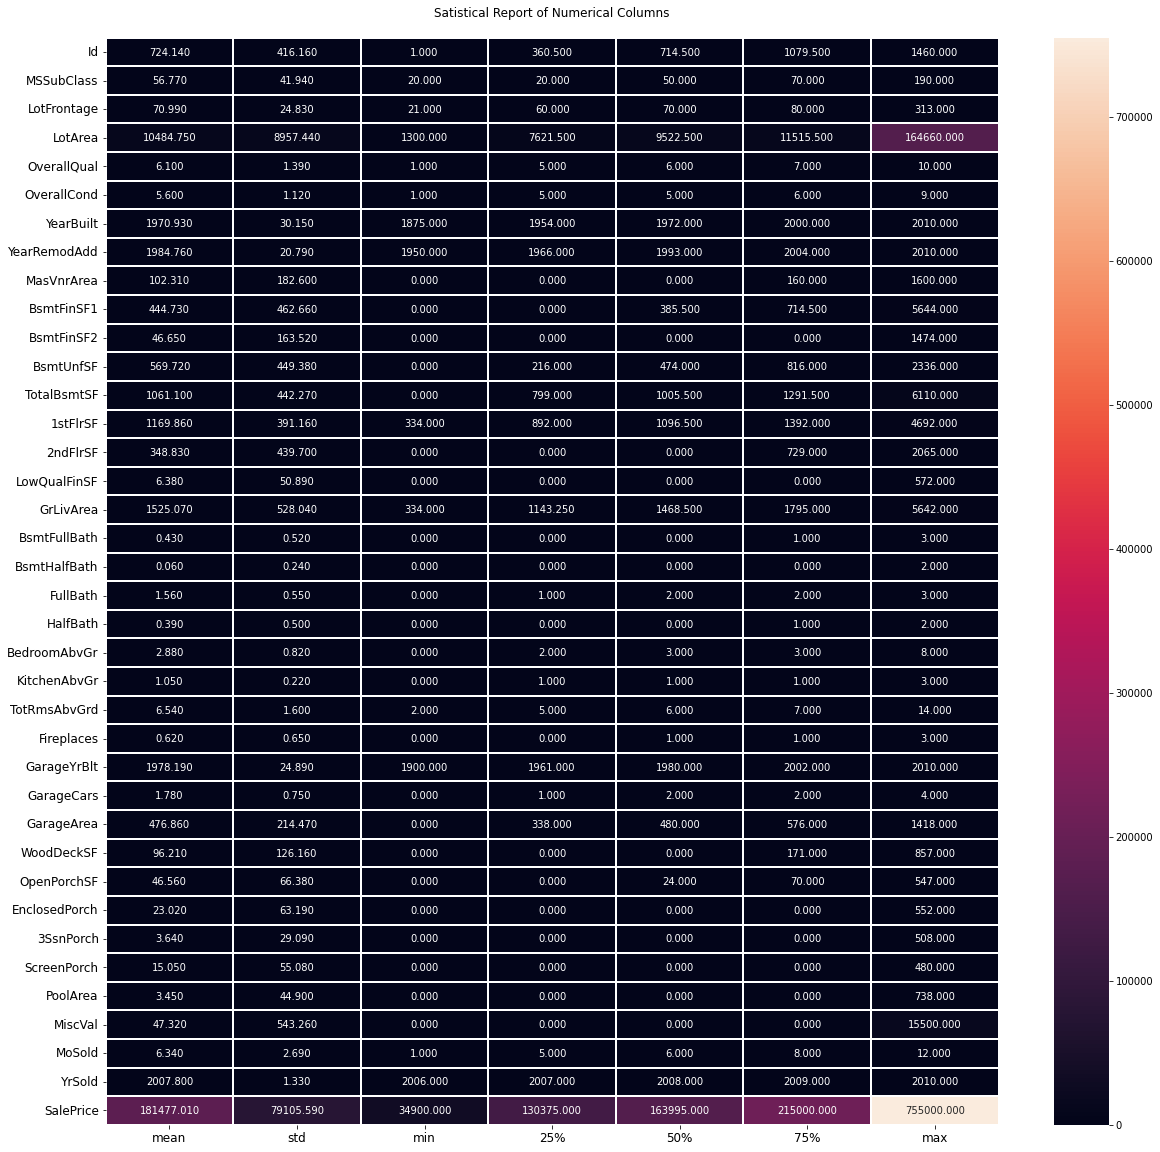

In [12]:
plt.figure(figsize=(20,20))
sns.heatmap(round(train_df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt='.3f',cmap='rocket')
plt.title("Satistical Report of Numerical Columns\n")
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

we can see that our target variable salePrice has values higher compared to other features.

In [13]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   LotShape       1168 non-null   object 
 7   LandContour    1168 non-null   object 
 8   Utilities      1168 non-null   object 
 9   LotConfig      1168 non-null   object 
 10  LandSlope      1168 non-null   object 
 11  Neighborhood   1168 non-null   object 
 12  Condition1     1168 non-null   object 
 13  Condition2     1168 non-null   object 
 14  BldgType       1168 non-null   object 
 15  HouseStyle     1168 non-null   object 
 16  OverallQual    1168 non-null   int64  
 17  OverallCond    1168 non-null   int64  
 18  YearBuil

we observe that there is a mixture of object, float and  integer datatype. The oject data type will have to be coverted to integer or float in order for the machine to understand it.

# Checking Unique Values

In [14]:
train_df.nunique()

Id               1168
MSSubClass         15
MSZoning            5
LotFrontage       106
LotArea           892
Street              2
LotShape            4
LandContour         4
Utilities           1
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         110
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        14
Exterior2nd        15
MasVnrType          4
MasVnrArea        283
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        551
BsmtFinType2        6
BsmtFinSF2        122
BsmtUnfSF         681
TotalBsmtSF       636
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          669
2ndFlrSF          351
LowQualFinSF       21
GrLivArea 

The columns that have all the rows filled with all unique values or all the rows filled with one value is not usefull in prediction. Hence i will drop them.

Preprocessing step 2

In [15]:
train_df.drop(['Id','Utilities'],axis=1,inplace=True)

In [16]:
train_df.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
LotShape          object
LandContour       object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object
HeatingQC         object
CentralAir        object
Electrical        object


Now i will seperate the datatypes into object and int or float for ease

In [17]:
object_datatype=[]
for x in train_df.dtypes.index:
    if train_df.dtypes[x]=='object':
        object_datatype.append(x)
print(f'\nColumn names of object DataType',object_datatype)

numeric_datatype=[]
for x in train_df.dtypes.index:
    if train_df.dtypes[x]=='int64' or train_df.dtypes[x]=='float64':
        numeric_datatype.append(x)
print(f'\nColumn names of numeric DataType',numeric_datatype)


Column names of object DataType ['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']

Column names of numeric DataType ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPo

# Filling Missing Data

I will be filling the missing data with the mode for object datatype columns and with the mean for munerical datatype columns

Mode:
- MasVnrType
- BsmtQual
- BsmtCond
- BsmtExposure
- BsmtFinType1
- BsmtFinType2
- GarageType
- GarageFinish
- GarageQual
- GarageCond

Mean:
- LotFrontage
- MasVnrArea
- GarageYrBlt

Data Preprocessing step 3

In [18]:
mode = ["MasVnrType", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "GarageType",
        "GarageFinish", "GarageQual", "GarageCond"]
mean = ["LotFrontage", "MasVnrArea", "GarageYrBlt"]

for i in mode:
    train_df[i] = train_df[i].fillna(train_df[i].mode()[0])
    
for j in mean:
    train_df[j] = train_df[j].fillna(train_df[j].mean())
    
print("Count of missing values after filling the data")
print(train_df.isna().sum())

Count of missing values after filling the data
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
Kit

we have successfully filled our missing values with the respective mean and mode

# Visualization

In [19]:
train_df.nunique().sort_values()

CentralAir         2
Street             2
GarageFinish       3
HalfBath           3
LandSlope          3
BsmtHalfBath       3
PavedDrive         3
BsmtExposure       4
BsmtCond           4
BsmtQual           4
MasVnrType         4
Fireplaces         4
KitchenQual        4
ExterQual          4
FullBath           4
KitchenAbvGr       4
BsmtFullBath       4
LotShape           4
LandContour        4
Electrical         5
MSZoning           5
YrSold             5
ExterCond          5
LotConfig          5
BldgType           5
GarageCond         5
HeatingQC          5
GarageQual         5
GarageCars         5
GarageType         6
SaleCondition      6
BsmtFinType2       6
Heating            6
Foundation         6
RoofStyle          6
BsmtFinType1       6
Functional         7
RoofMatl           8
PoolArea           8
HouseStyle         8
Condition2         8
BedroomAbvGr       8
OverallCond        9
Condition1         9
SaleType           9
OverallQual       10
TotRmsAbvGrd      12
MoSold       

i have sorted the columns based on their uniques values which will make it easier for us to visualize the data.
I will be seperating the columns based on single,double and triple digits.

In [20]:
single = ["CentralAir", "Street", "GarageFinish", "HalfBath", "LandSlope", "BsmtHalfBath", "PavedDrive", "BsmtExposure",
         "BsmtCond", "BsmtQual", "MasVnrType", "Fireplaces", "KitchenQual", "ExterQual", "FullBath", "KitchenAbvGr",
         "BsmtFullBath", "LotShape", "LandContour", "Electrical", "MSZoning", "YrSold", "ExterCond", "LotConfig",
         "BldgType", "GarageCond", "HeatingQC", "GarageQual", "GarageCars", "GarageType", "SaleCondition", "BsmtFinType2",
         "Heating", "Foundation", "RoofStyle", "BsmtFinType1", "Functional", "RoofMatl", "PoolArea", "HouseStyle",
         "Condition2", "BedroomAbvGr", "OverallCond", "Condition1", "SaleType"]

double = ["OverallQual", "TotRmsAbvGrd", "MoSold", "Exterior1st", "MSSubClass", "Exterior2nd", "3SsnPorch", "MiscVal", 
          "LowQualFinSF", "Neighborhood", "YearRemodAdd", "ScreenPorch", "GarageYrBlt"]

triple = ["EnclosedPorch", "LotFrontage", "YearBuilt", "BsmtFinSF2", "OpenPorchSF", "WoodDeckSF", "MasVnrArea", 
          "2ndFlrSF", "GarageArea", "BsmtFinSF1", "SalePrice", "TotalBsmtSF", "1stFlrSF", "BsmtUnfSF", "GrLivArea", 
          "LotArea"]


Single Digit Unique Values:
- CentralAir         2
- Street             2
- GarageFinish       3
- HalfBath           3
- LandSlope          3
- BsmtHalfBath       3
- PavedDrive         3
- BsmtExposure       4
- BsmtCond           4
- BsmtQual           4
- MasVnrType         4
- Fireplaces         4
- KitchenQual        4
- ExterQual          4
- FullBath           4
- KitchenAbvGr       4
- BsmtFullBath       4
- LotShape           4
- LandContour        4
- Electrical         5
- MSZoning           5
- YrSold             5
- ExterCond          5
- LotConfig          5
- BldgType           5
- GarageCond         5
- HeatingQC          5
- GarageQual         5
- GarageCars         5
- GarageType         6
- SaleCondition      6
- BsmtFinType2       6
- Heating            6
- Foundation         6
- RoofStyle          6
- BsmtFinType1       6
- Functional         7
- RoofMatl           8
- PoolArea           8
- HouseStyle         8
- Condition2         8
- BedroomAbvGr       8
- OverallCond        9
- Condition1         9
- SaleType           9

Double Digit Unique Values:
- OverallQual       10
- TotRmsAbvGrd      12
- MoSold            12
- Exterior1st       14
- MSSubClass        15
- Exterior2nd       15
- 3SsnPorch         18
- MiscVal           20
- LowQualFinSF      21
- Neighborhood      25
- YearRemodAdd      61
- ScreenPorch       65
- GarageYrBlt       98

Triple Digit Unique Values:
- EnclosedPorch    106
- LotFrontage      107
- YearBuilt        110
- BsmtFinSF2       122
- OpenPorchSF      176
- WoodDeckSF       244
- MasVnrArea       284
- 2ndFlrSF         351
- GarageArea       392
- BsmtFinSF1       551
- SalePrice        581
- TotalBsmtSF      636
- 1stFlrSF         669
- BsmtUnfSF        681
- GrLivArea        746
- LotArea          892

# I will be plotting a pie chart for all the single digit columns

Single digit category column name: CentralAir


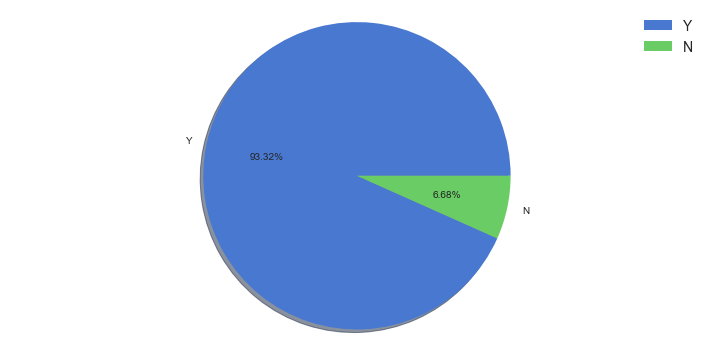

Single digit category column name: Street


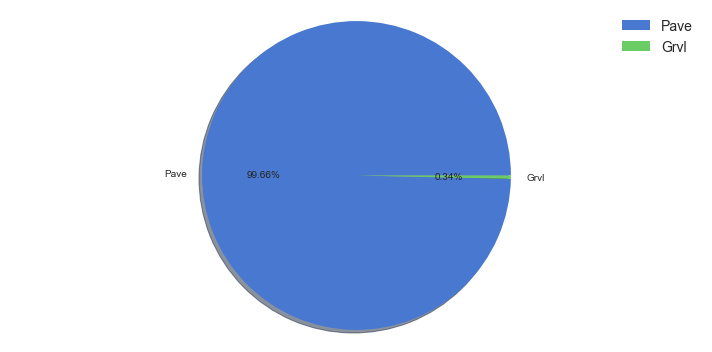

Single digit category column name: GarageFinish


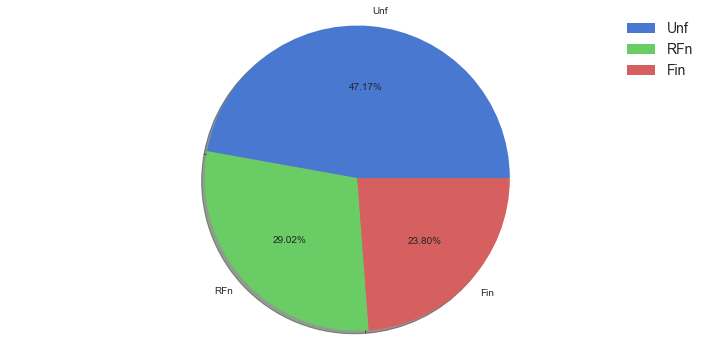

Single digit category column name: HalfBath


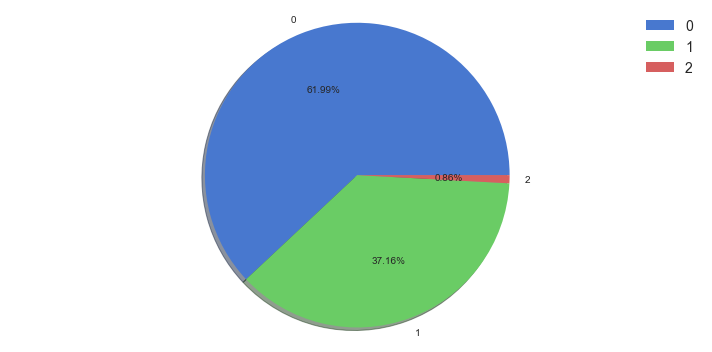

Single digit category column name: LandSlope


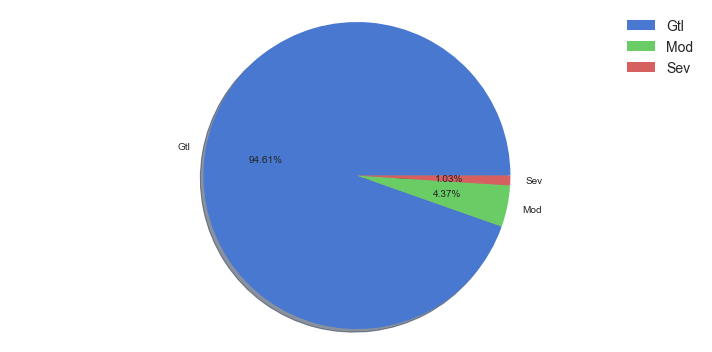

Single digit category column name: BsmtHalfBath


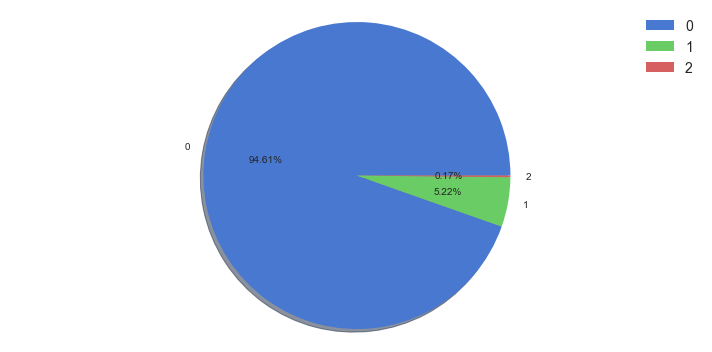

Single digit category column name: PavedDrive


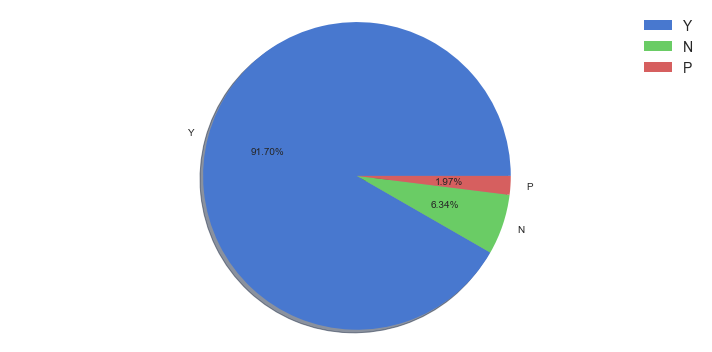

Single digit category column name: BsmtExposure


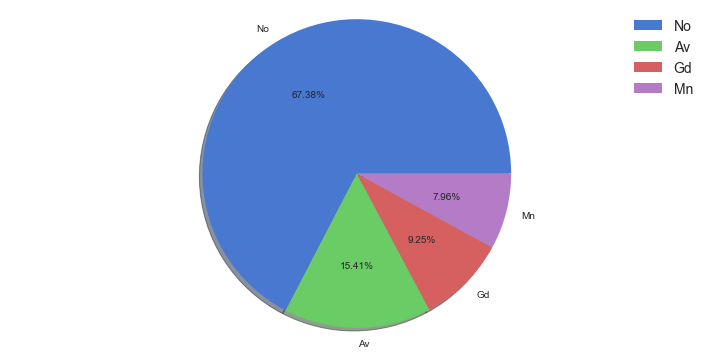

Single digit category column name: BsmtCond


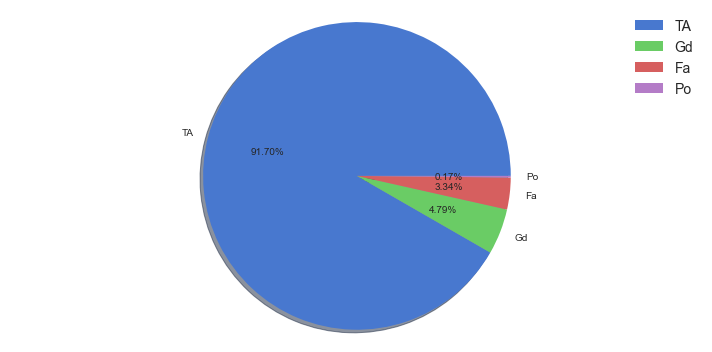

Single digit category column name: BsmtQual


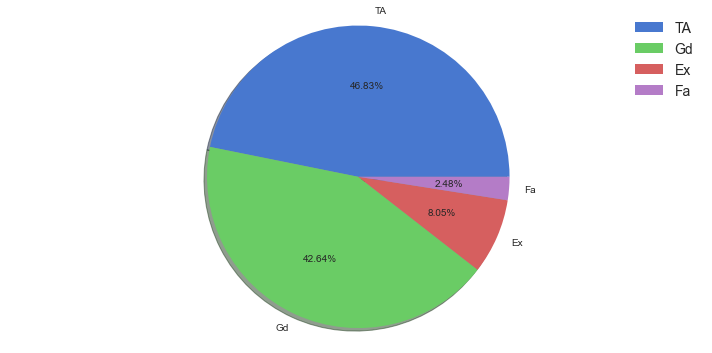

Single digit category column name: MasVnrType


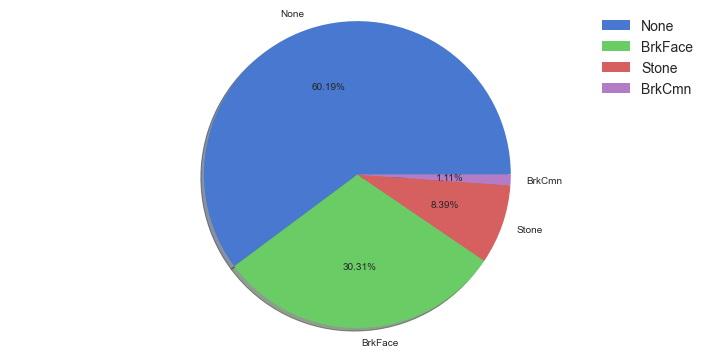

Single digit category column name: Fireplaces


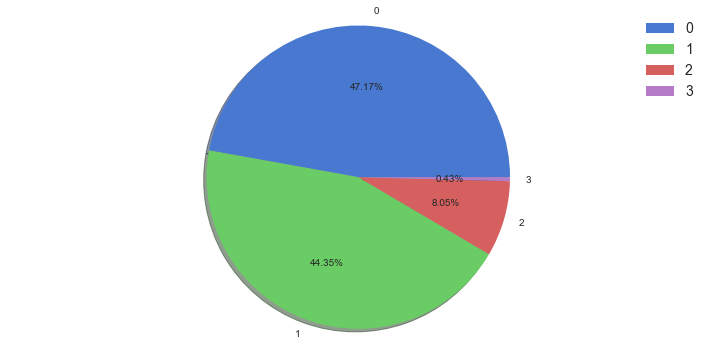

Single digit category column name: KitchenQual


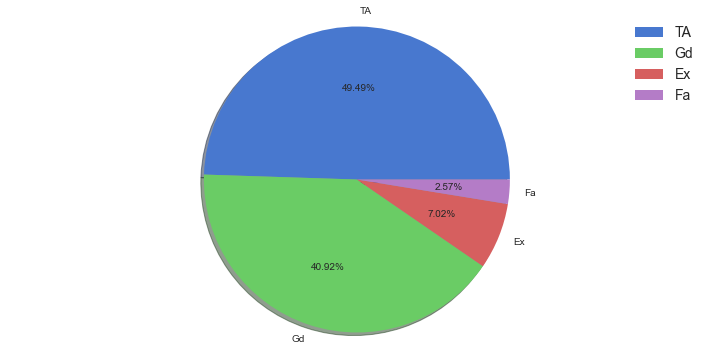

Single digit category column name: ExterQual


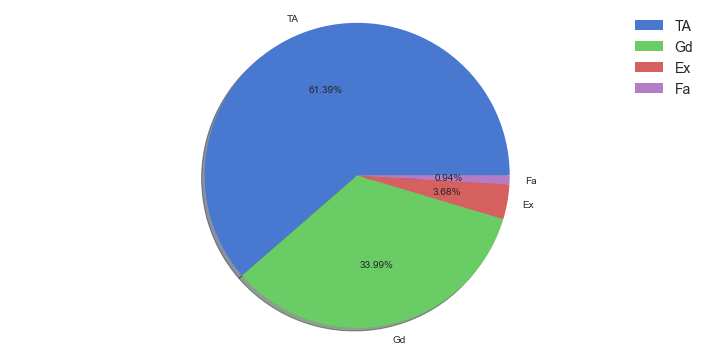

Single digit category column name: FullBath


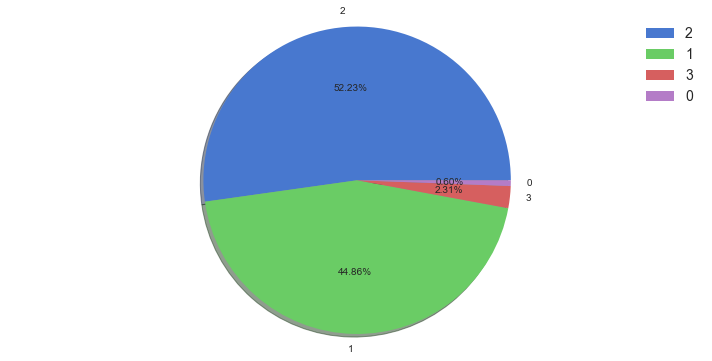

Single digit category column name: KitchenAbvGr


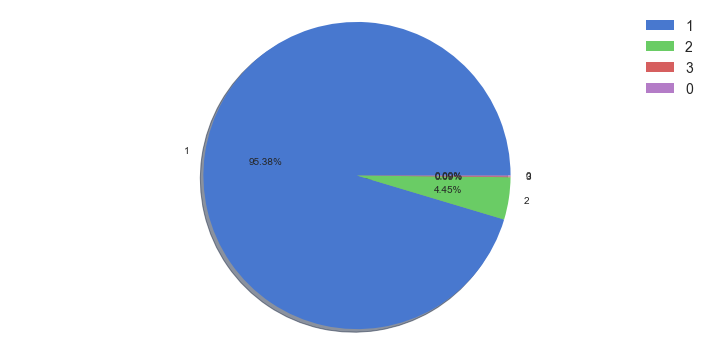

Single digit category column name: BsmtFullBath


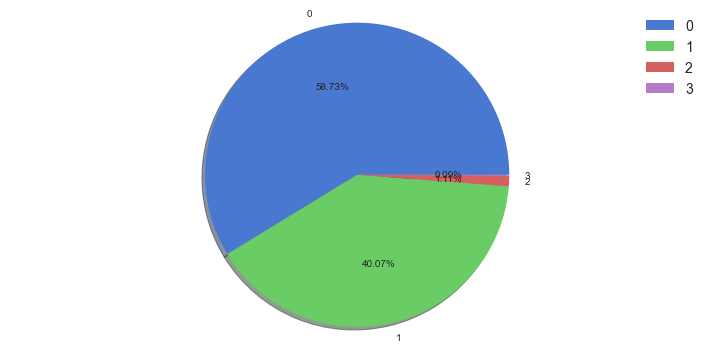

Single digit category column name: LotShape


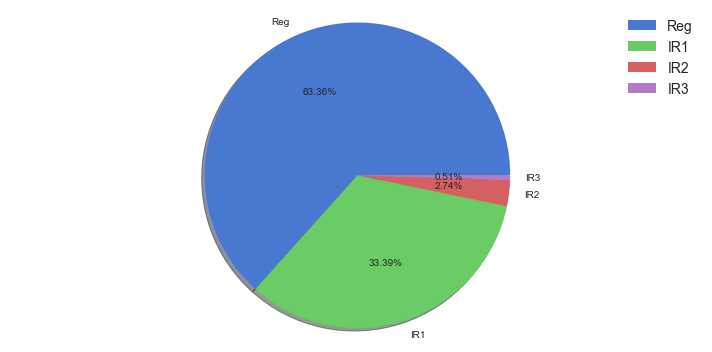

Single digit category column name: LandContour


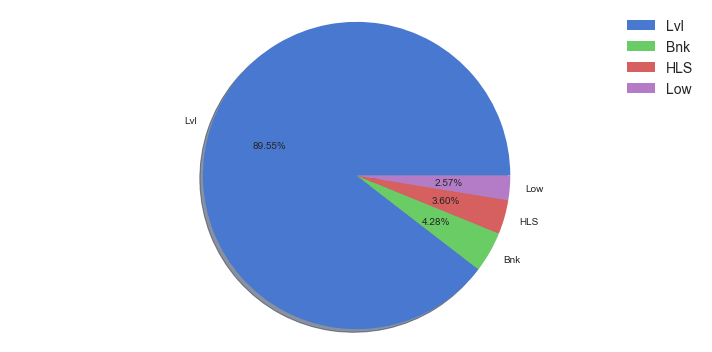

Single digit category column name: Electrical


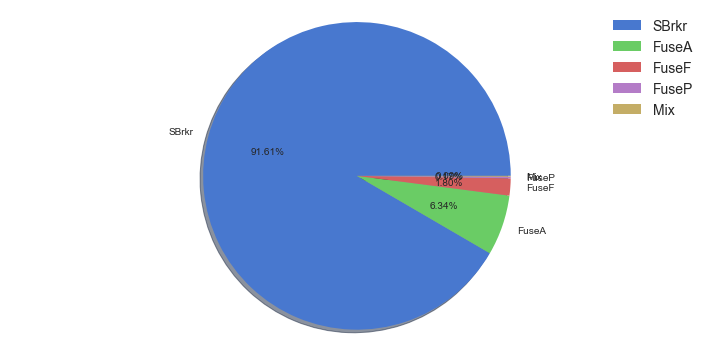

Single digit category column name: MSZoning


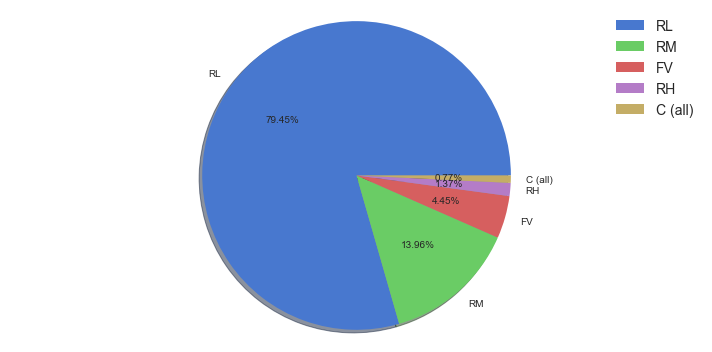

Single digit category column name: YrSold


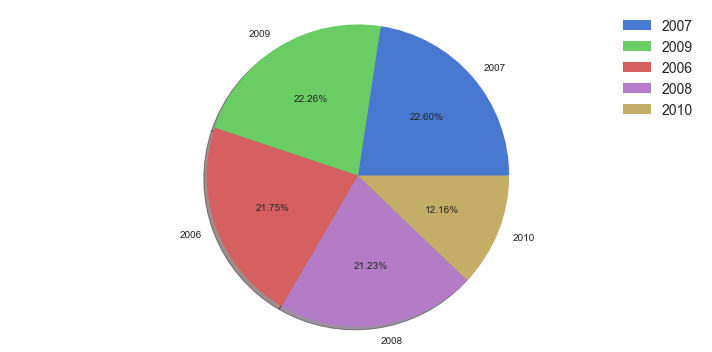

Single digit category column name: ExterCond


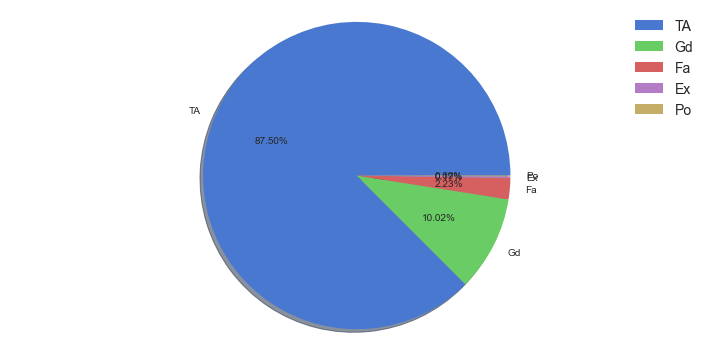

Single digit category column name: LotConfig


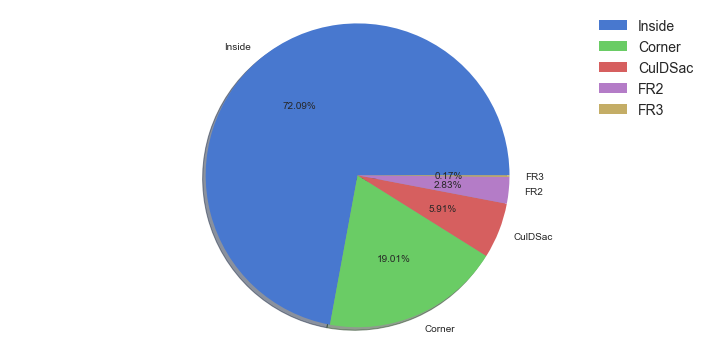

Single digit category column name: BldgType


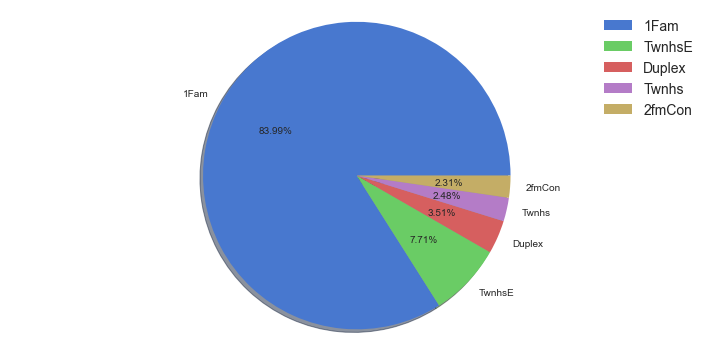

Single digit category column name: GarageCond


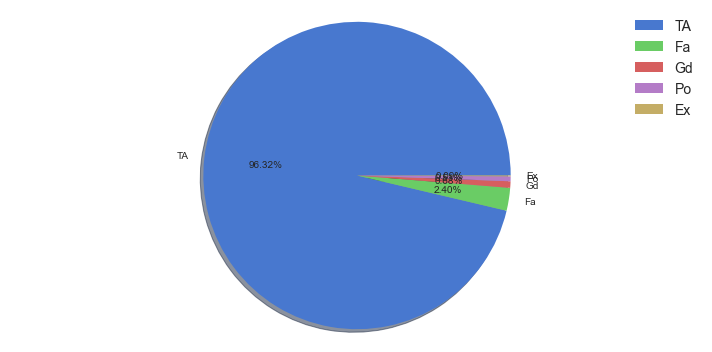

Single digit category column name: HeatingQC


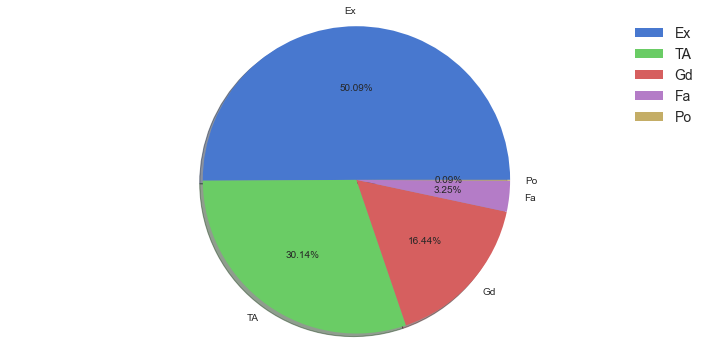

Single digit category column name: GarageQual


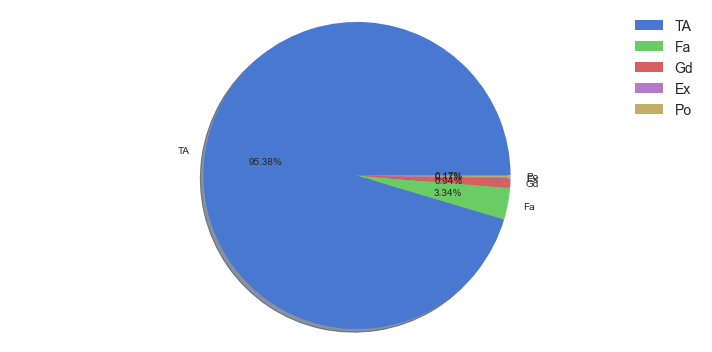

Single digit category column name: GarageCars


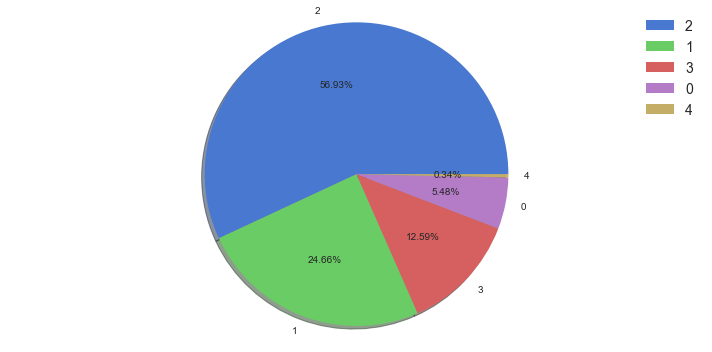

Single digit category column name: GarageType


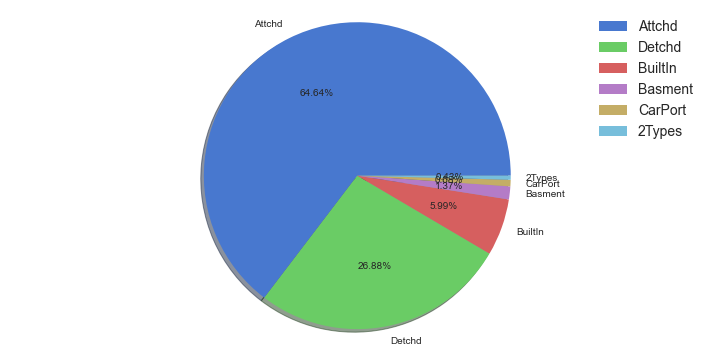

Single digit category column name: SaleCondition


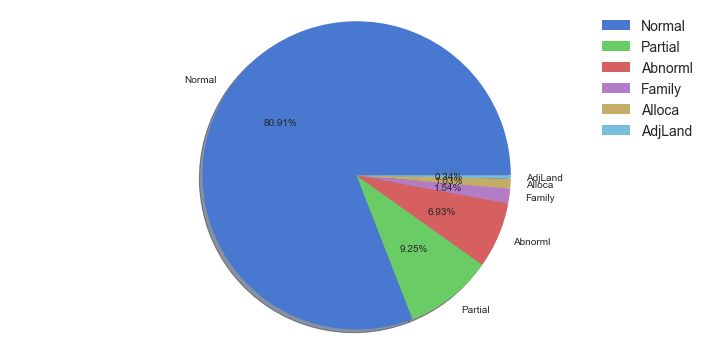

Single digit category column name: BsmtFinType2


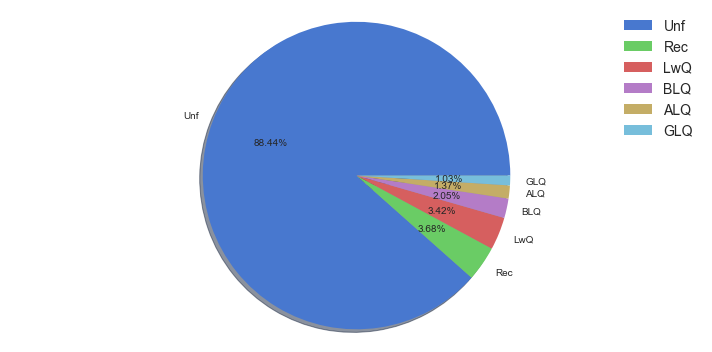

Single digit category column name: Heating


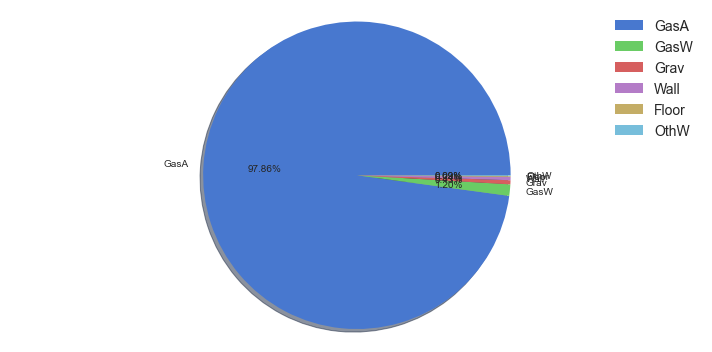

Single digit category column name: Foundation


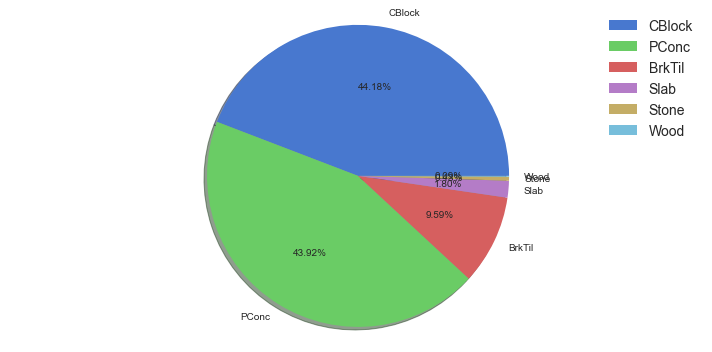

Single digit category column name: RoofStyle


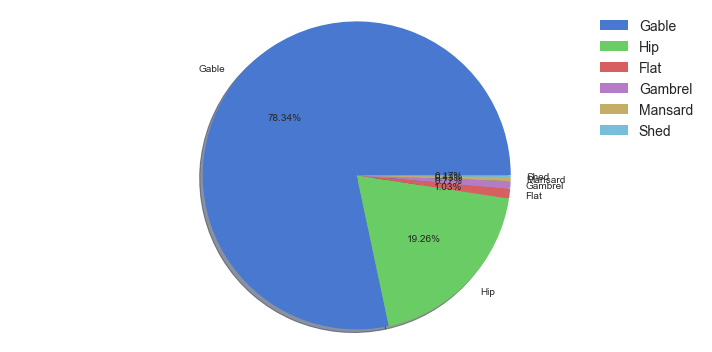

Single digit category column name: BsmtFinType1


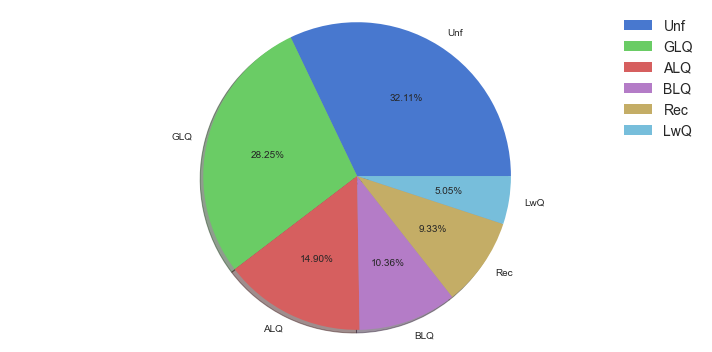

Single digit category column name: Functional


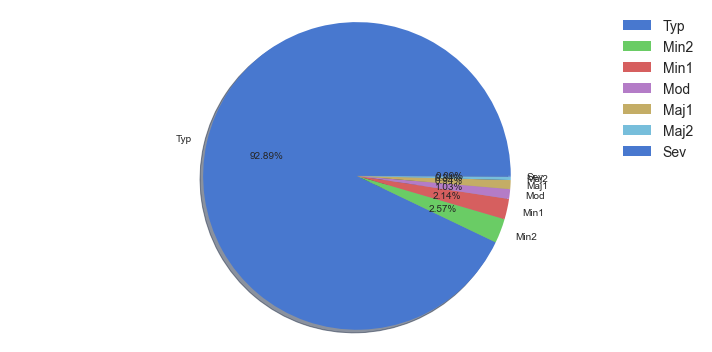

Single digit category column name: RoofMatl


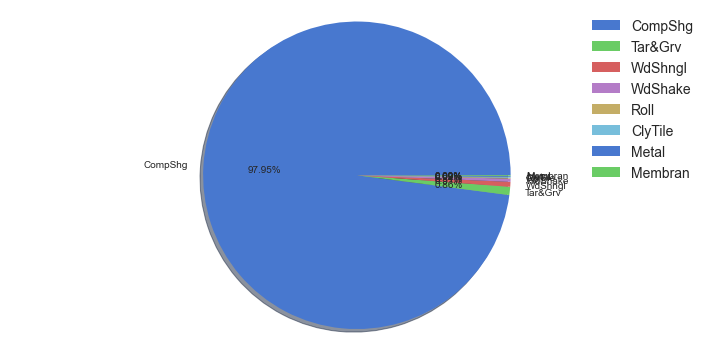

Single digit category column name: PoolArea


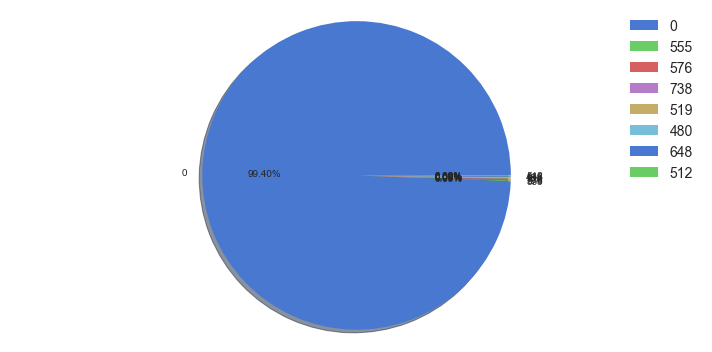

Single digit category column name: HouseStyle


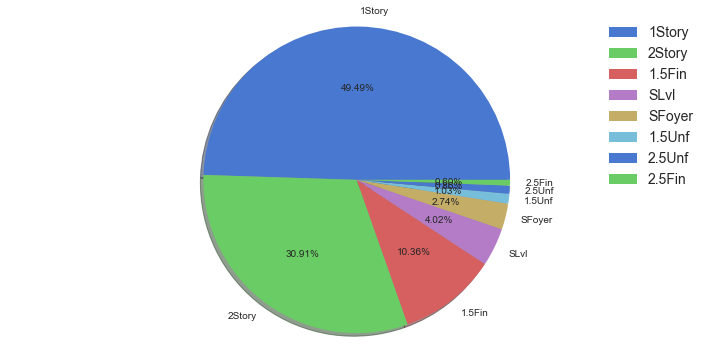

Single digit category column name: Condition2


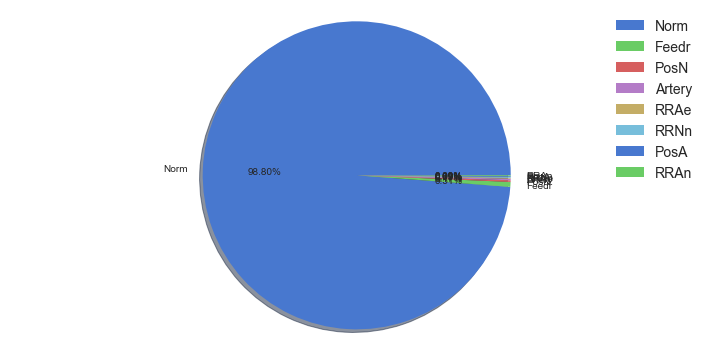

Single digit category column name: BedroomAbvGr


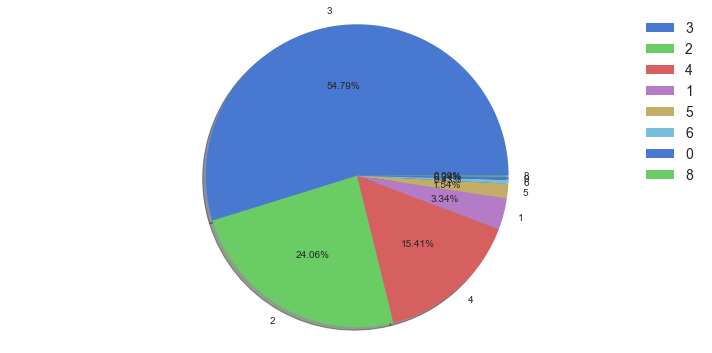

Single digit category column name: OverallCond


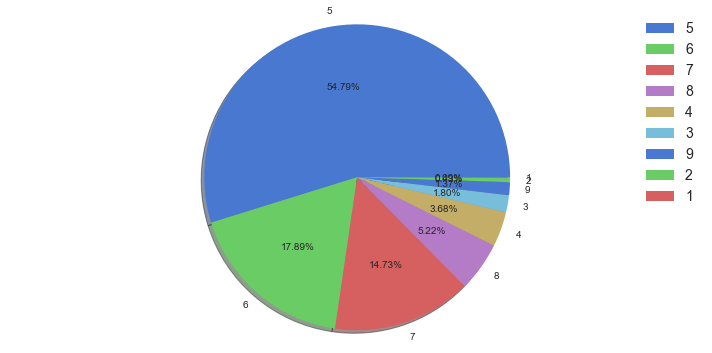

Single digit category column name: Condition1


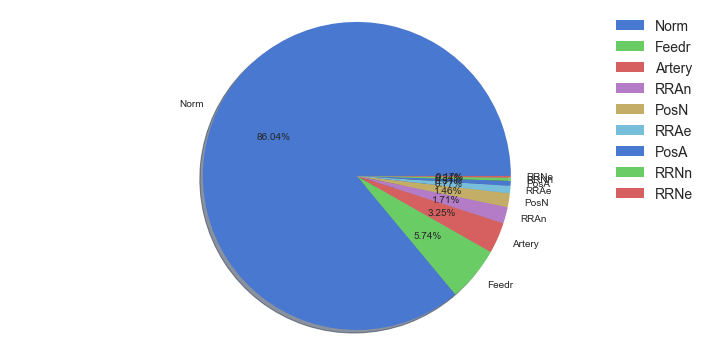

Single digit category column name: SaleType


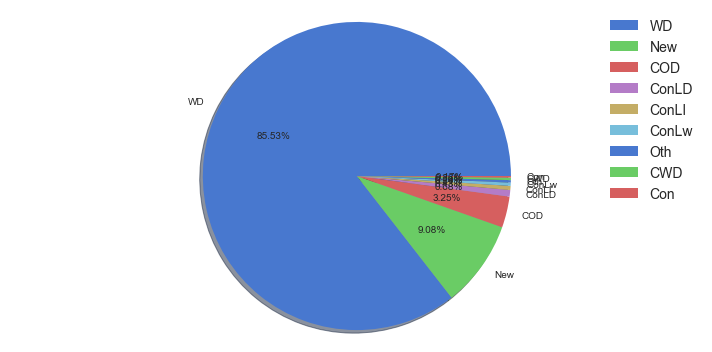

In [21]:
plt.style.use('seaborn-muted')
def generate_pie(x):
    plt.style.use('seaborn-white')
    plt.figure(figsize=(10,5))
    plt.pie(x.value_counts(), labels=x.value_counts().index, shadow=True, autopct='%1.2f%%')
    plt.legend(prop={'size':14})
    plt.axis('equal')
    plt.tight_layout()
    return plt.show()

for i in train_df[single]:
    print(f"Single digit category column name:", i)
    generate_pie(train_df[i])
    

## Observations
- for feature LotFrontage:
•	Data is not distributed normally or in bell curve.
•	Data ranges from 21 to 313 with mean value 70.99
•	Data is sort of positively skewed.
- for feature LotArea:
•	Data is not distributed normally or in bell curve.
•	Data ranges from 1300 to 164660 with mean value 10484.75
•	Data is highly positively skewed and needs to be treated accordingly.
- for feature YearBuilt:
•	Data is not distributed normally or in bell curve.
•	Data ranges from 1875 to 2010 with mean value 1971
•	Data is sort of negatively skewed.
- for feature YearRemodAdd:
•	Data is not distributed normally or in bell curve.
•	Data ranges from 1950 to 2010 with mean value 1985
•	Data is sort of negatively skewed.
- for feature MassVnrArea:
•	Data is not distributed normally or in bell curve.
•	Data ranges from 0 to 1600 with mean value 102.31
•	Data is sort of positively skewed.
•	Data is spreaded.
- for feature BsmtFinSF1:
•	Data is not distributed normally or in bell curve.
•	Data ranges from 0 to 5644 with mean value 444.73
•	Data is sort of positively skewed.
•	Data is spreaded.
- for feature BsmtFinSF2:
•	Data is not distributed normally or in bell curve.
•	Data ranges from 0 to 1474 with mean value 46.65
•	Data is sort of positively skewed.
•	Data is spreaded.
- for feature BsmtUnfSF:
•	Data is not distributed normally or in bell curve.
•	Data ranges from 0 to 2336 with mean value 569.72
•	Data is sort of positively skewed.
•	Data is spreaded.
- for feature TotalBsmtSF:
•	Data is not distributed normally or in bell curve.
•	Data ranges from 0 to 6110 with mean value 1061.1
•	Data is sort of positively skewed.
•	Data is spreaded.
- for feature 1stFlrSF:
•	Data is not distributed normally or in bell curve.
•	Data ranges from 334 to 4692 with mean value 1169.86
•	Data is sort of positively skewed.
•	Data is spreaded.
- for feature 2ndFlrSF:
•	Data is not distributed normally or in bell curve.
•	Data ranges from 0 to 2065 with mean value 348.83
•	Data is sort of positively skewed.
•	Data is spreaded.
- for feature LowQualFinSF:
•	Data is not distributed normally or in bell curve.
•	Data ranges from 0 to 572 with mean value 6.38
•	Data is highly positively skewed and needs to be treated accordingly.
- for feature GrLivArea:
•	Data is not distributed normally or in bell curve.
•	Data ranges from 334 to 5642 with mean value 1525.07
•	Data is sort of positively skewed.
•	Data is spreaded.
- for feature BsmtFullBath:
•	Data is not distributed normally or in bell curve.
•	Data ranges from 0 to 3 with mean value 0.43
- for feature BsmtHalfBath:
•	Data is not distributed normally or in bell curve.
•	Data ranges from 0 to 2 with mean value 0.06
•	Data is positively skewed.
- for feature FullBath:
•	Data is not distributed normally or in bell curve.
•	Data ranges from 0 to 3 with mean value 1.56
- for feature HalfBath:
•	Data is not distributed normally or in bell curve.
•	Data ranges from 0 to 2 with mean value 0.39
- for feature BedroomAbvGr:
•	Data is not distributed normally or in bell curve.
•	Data ranges from 0 to 8 with mean value 2.88
- for feature KitchenAbvGr:
•	Data is not distributed normally or in bell curve.
•	Data ranges from 0 to 3 with mean value 1.05
- for feature TotRmsAbvGrd:
•	Data is not distributed normally or in bell curve.
•	Data ranges from 2 to 14 with mean value 6.54
- for feature Fireplaces:
•	Data is not distributed normally or in bell curve.
•	Data ranges from 0 to 3 with mean value 0.62
- for feature GarageYrBlt:
•	Data is not distributed normally or in bell curve.
•	Data ranges from 1900 to 2010 with mean value 1978
- for feature GarageCars:
•	Data is not distributed normally or in bell curve.
•	Data ranges from 0 to 4 with mean value 1.78
- for feature GarageArea:
•	Data is not distributed normally or in bell curve.
•	Data ranges from 0 to 1418 with mean value 776.86
- for feature WoodDeckSF:
•	Data is not distributed normally or in bell curve.
•	Data ranges from 0 to 857 with mean value 96.21
•	Data is spreaded.
- for feature OpenPorchSF:
•	Data is not distributed normally or in bell curve.
•	Data ranges from 0 to 547 with mean value 46.56
•	Data is spreaded.
- for feature EnclosedPorch:
•	Data is not distributed normally or in bell curve.
•	Data ranges from 0 to 552 with mean value 23.02
- for feature 3SsnPorch:
•	Data is not distributed normally or in bell curve.
•	Data ranges from 0 to 508 with mean value 3.64
- for feature ScreenPorch:
•	Data is not distributed normally or in bell curve.
•	Data ranges from 0 to 480 with mean value 15.05
•	Data is positively high skewed.
- for feature PoolArea:
•	Data is not distributed normally or in bell curve.
•	Data ranges from 0 to 738 with mean value 345
- for feature MiscVal:
•	Data is not distributed normally or in bell curve.
•	Data ranges from 0 to 15500 with mean value 47.32
•	Data is positively high skewed.
- for feature MoSold:
•	Data is not distributed normally or in bell curve.
•	Data ranges from 1 to 12 with mean value 6.34
- for feature YrSold:
•	Data is not distributed normally or in bell curve.
•	Data ranges from 2006 to 2010 with mean value 2007
- for feature SalePrice:
•	Data is somewhat distributed normally but not in bell curve.
•	Data ranges from 34900 to 755000 with mean value 181477.01

# Count Plot for double digit features

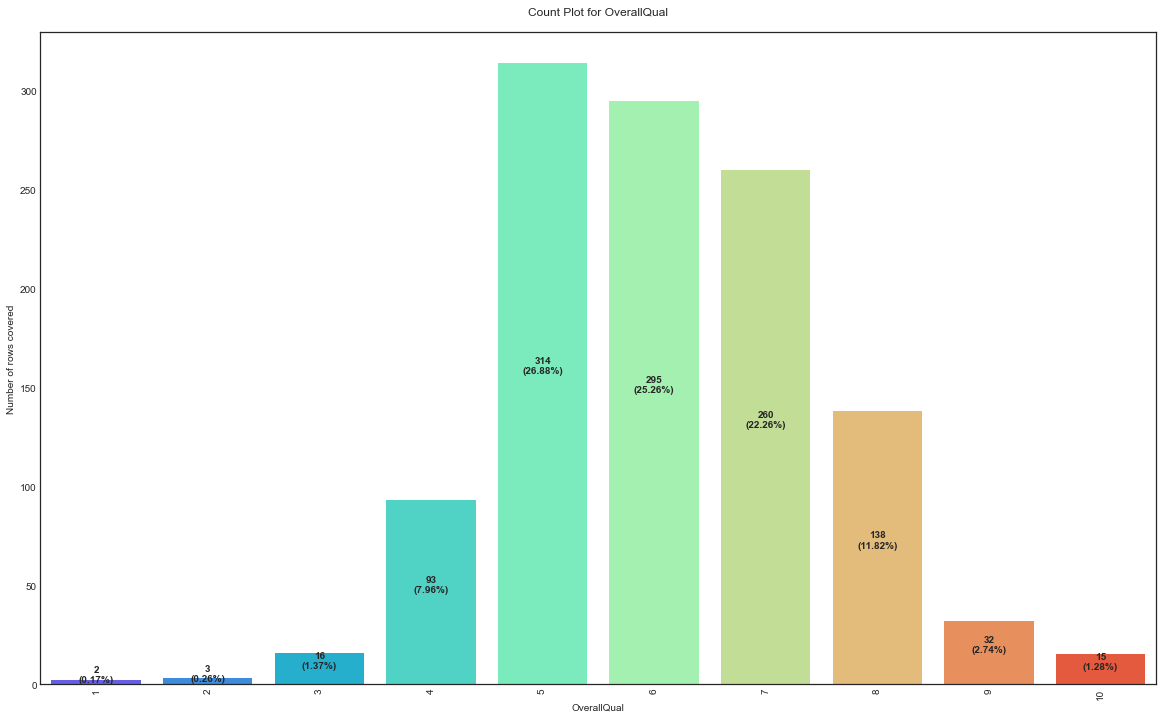

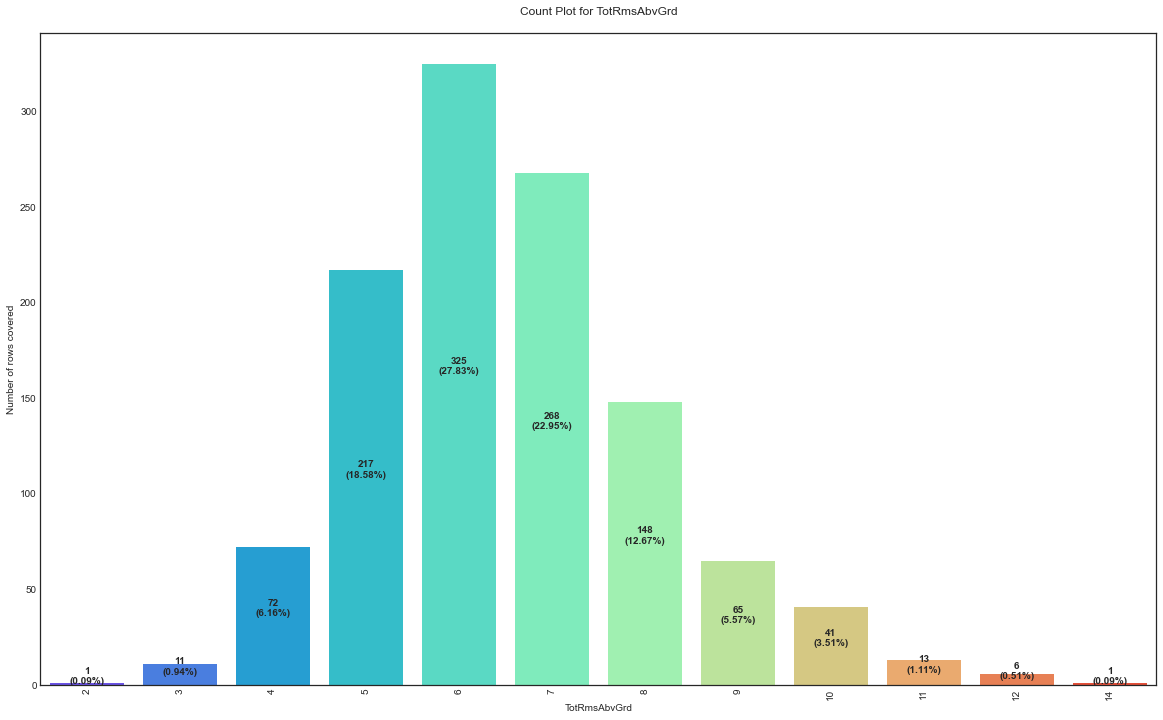

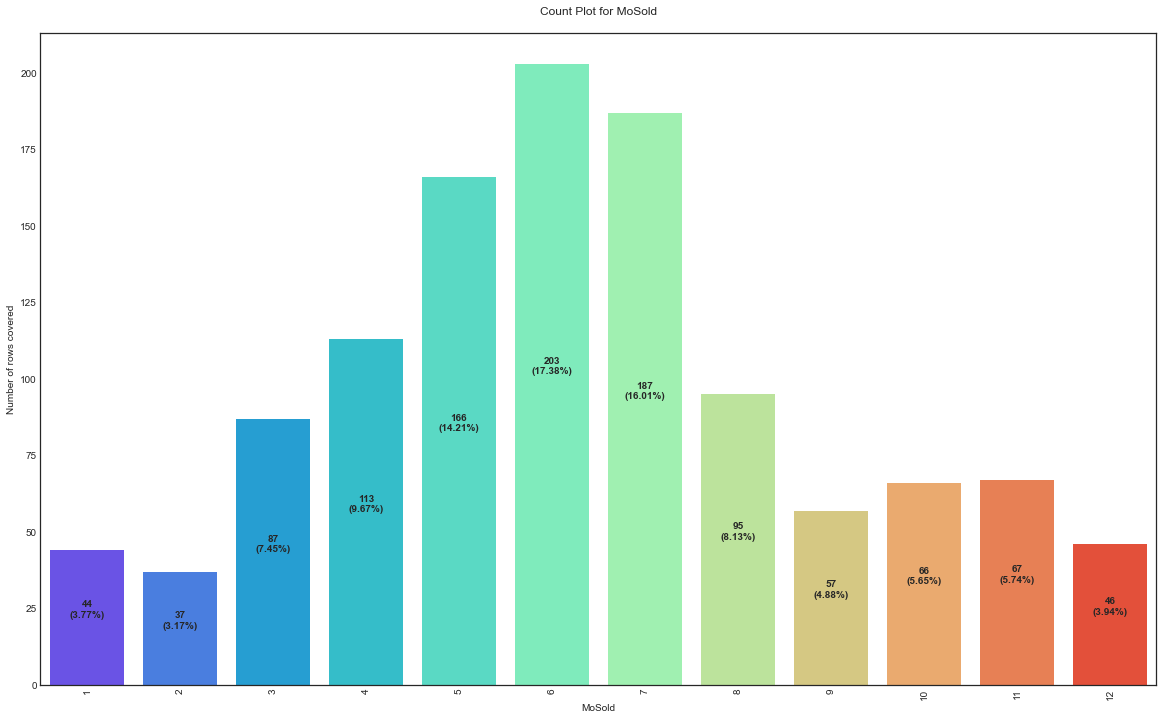

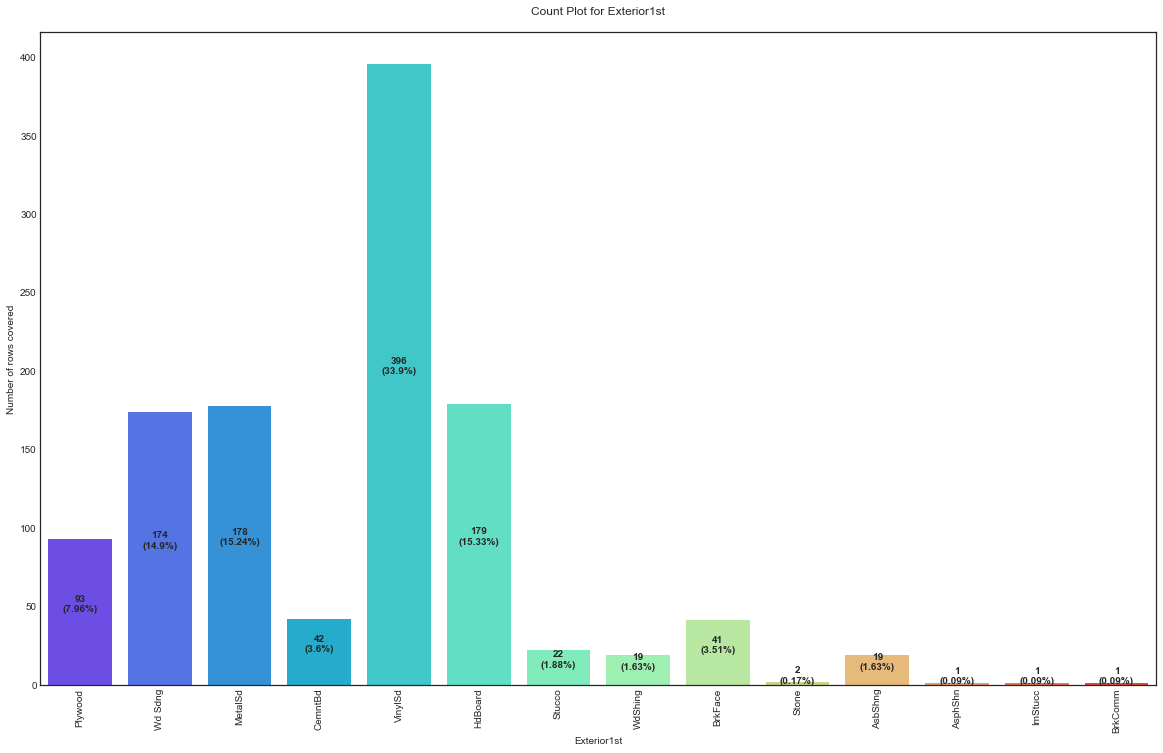

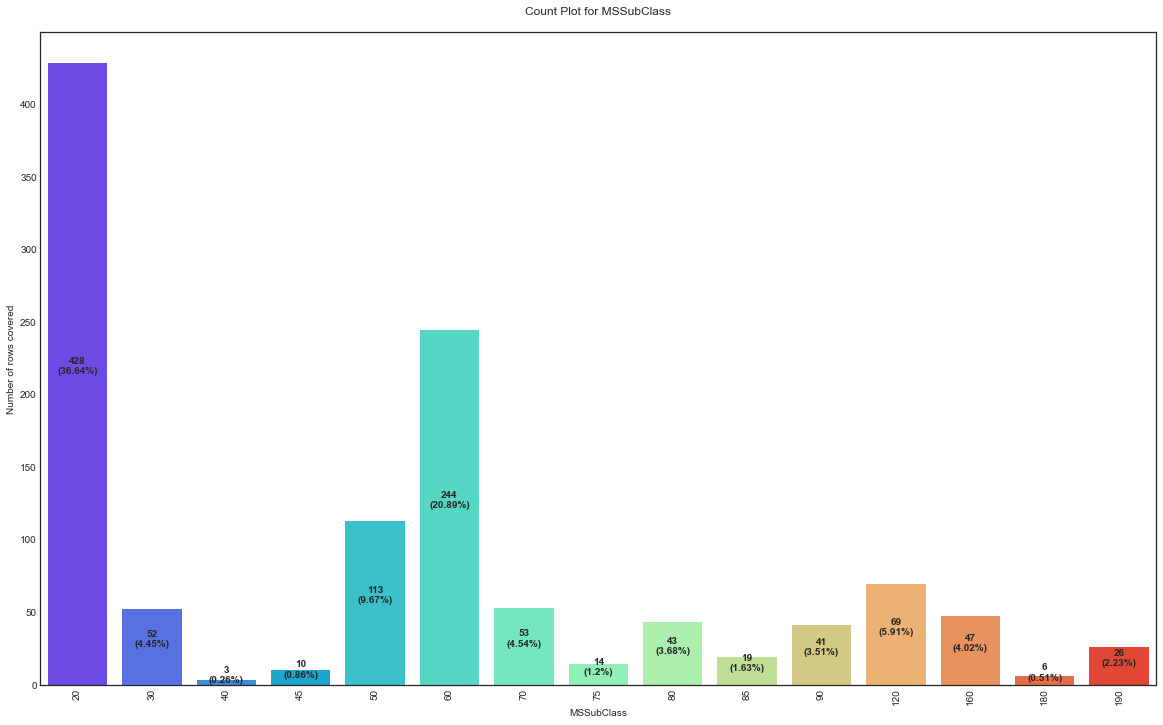

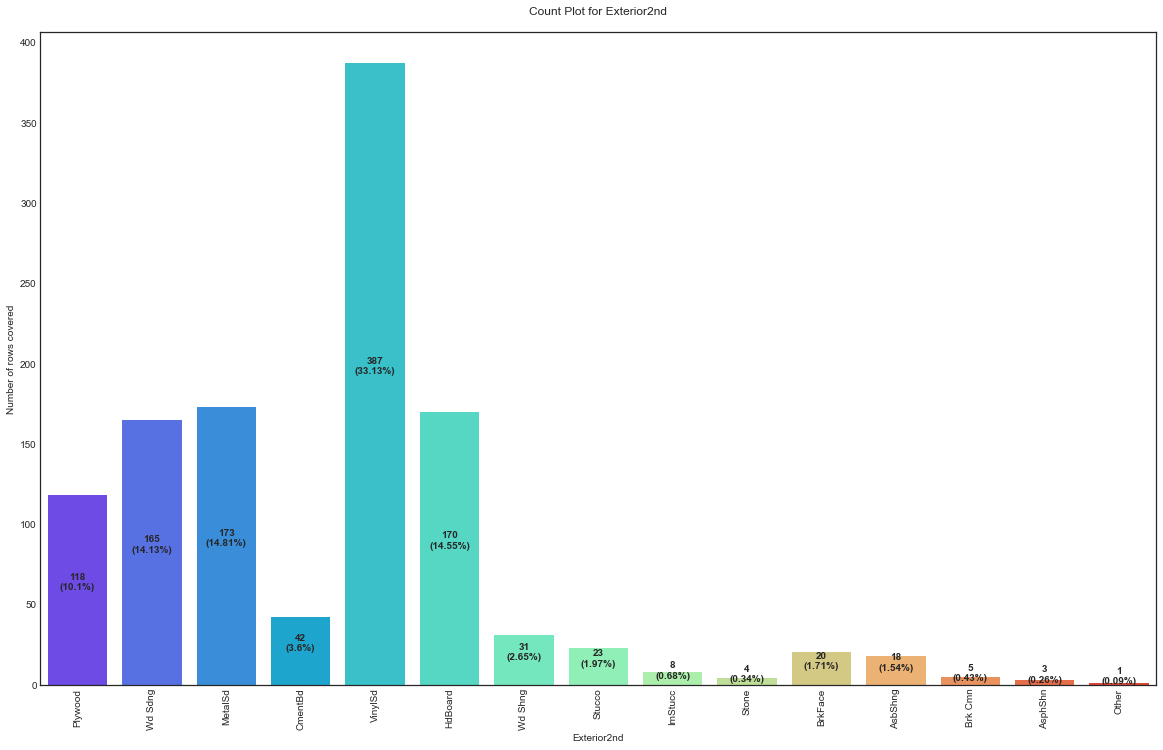

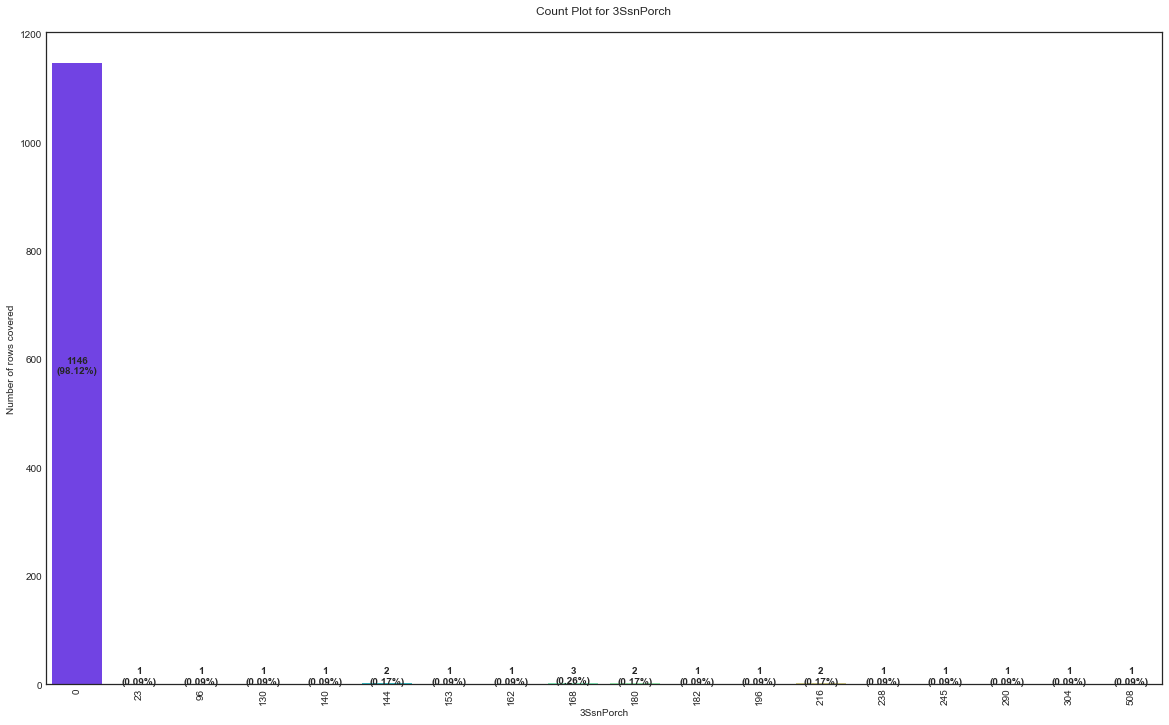

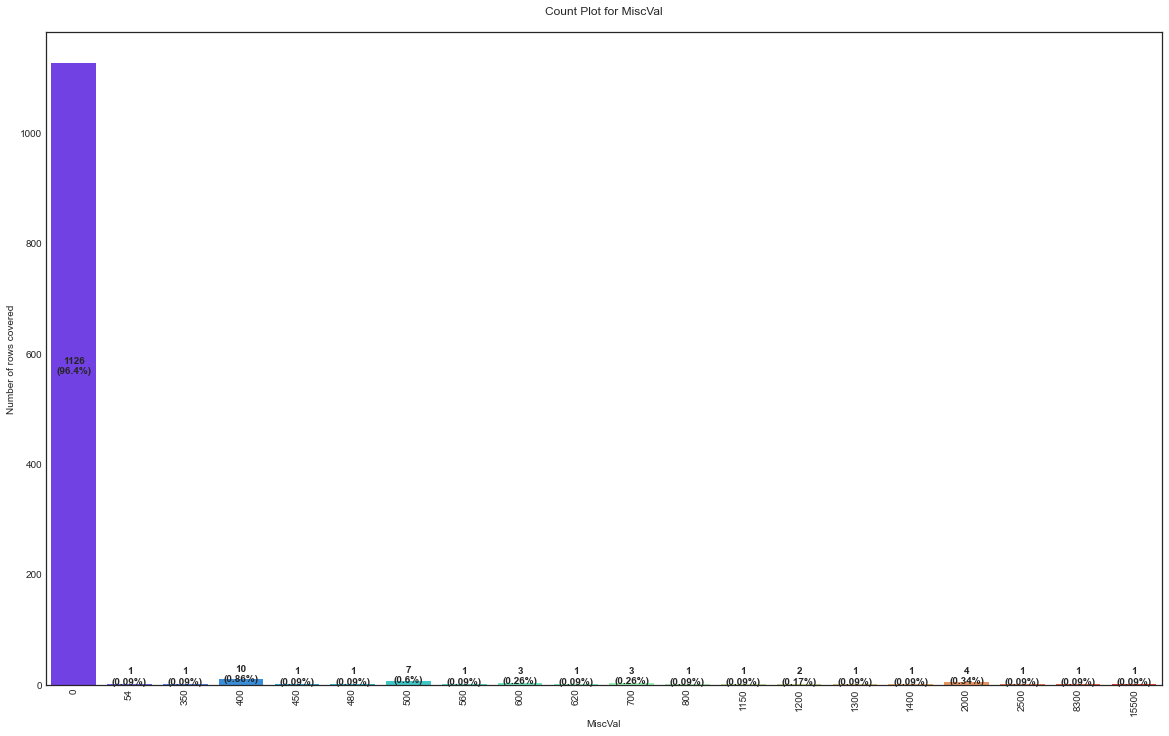

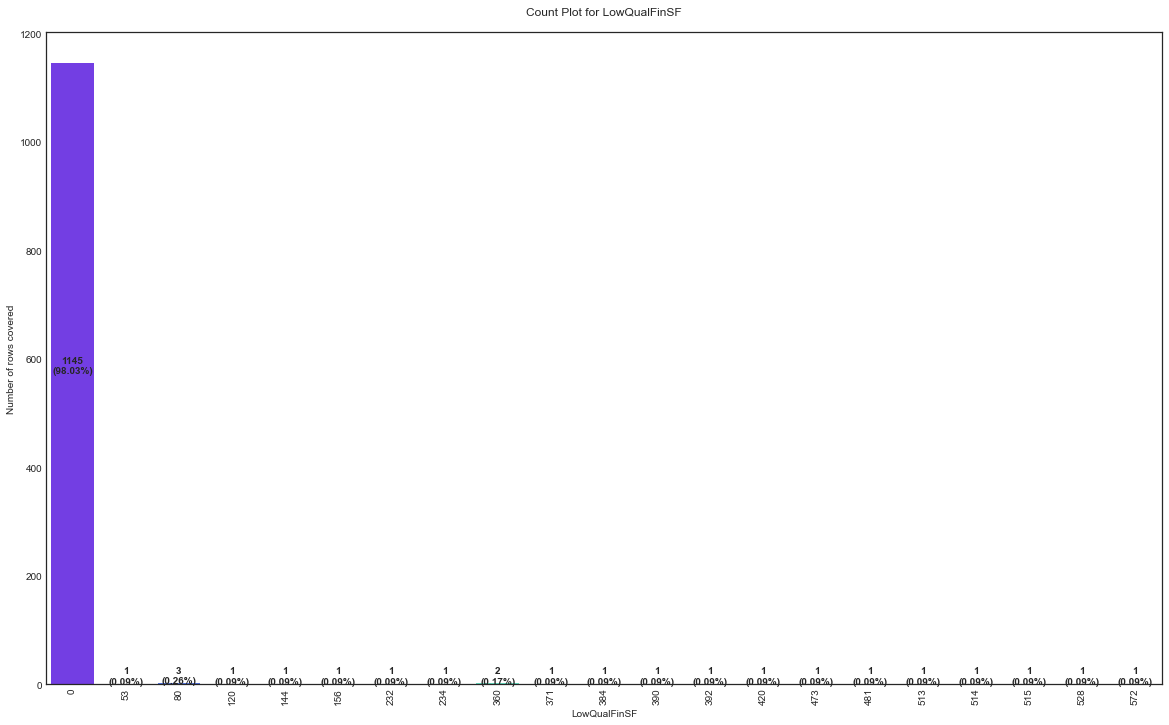

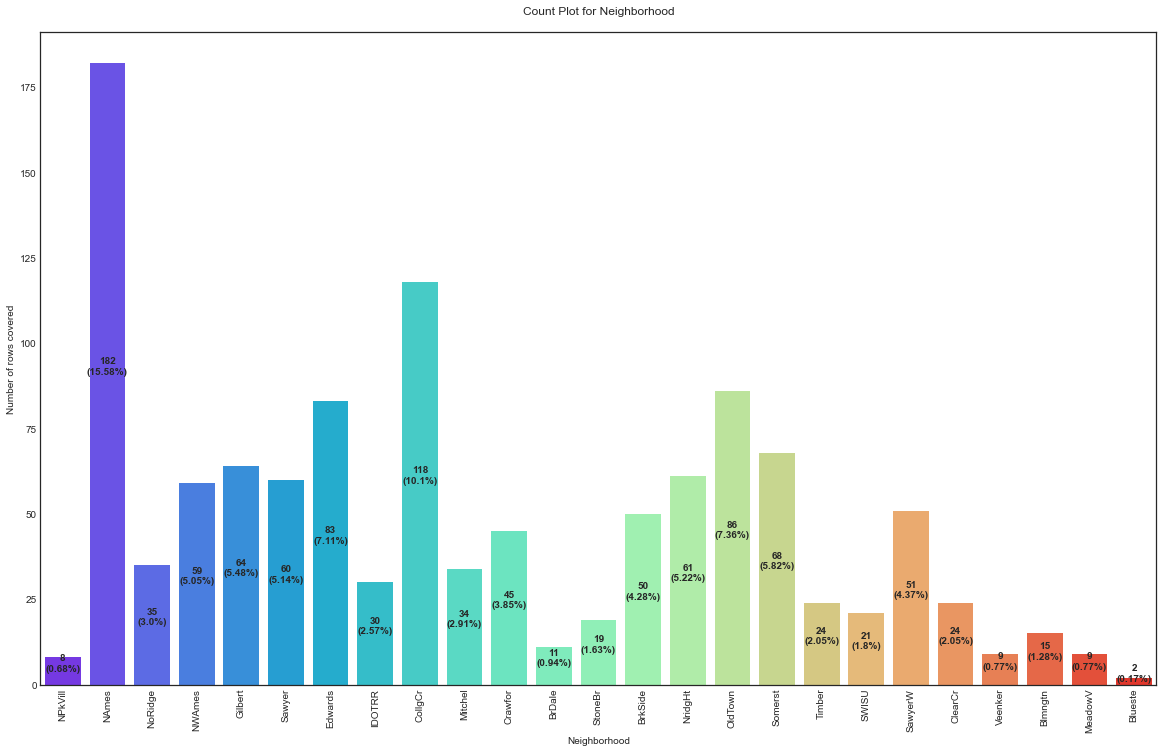

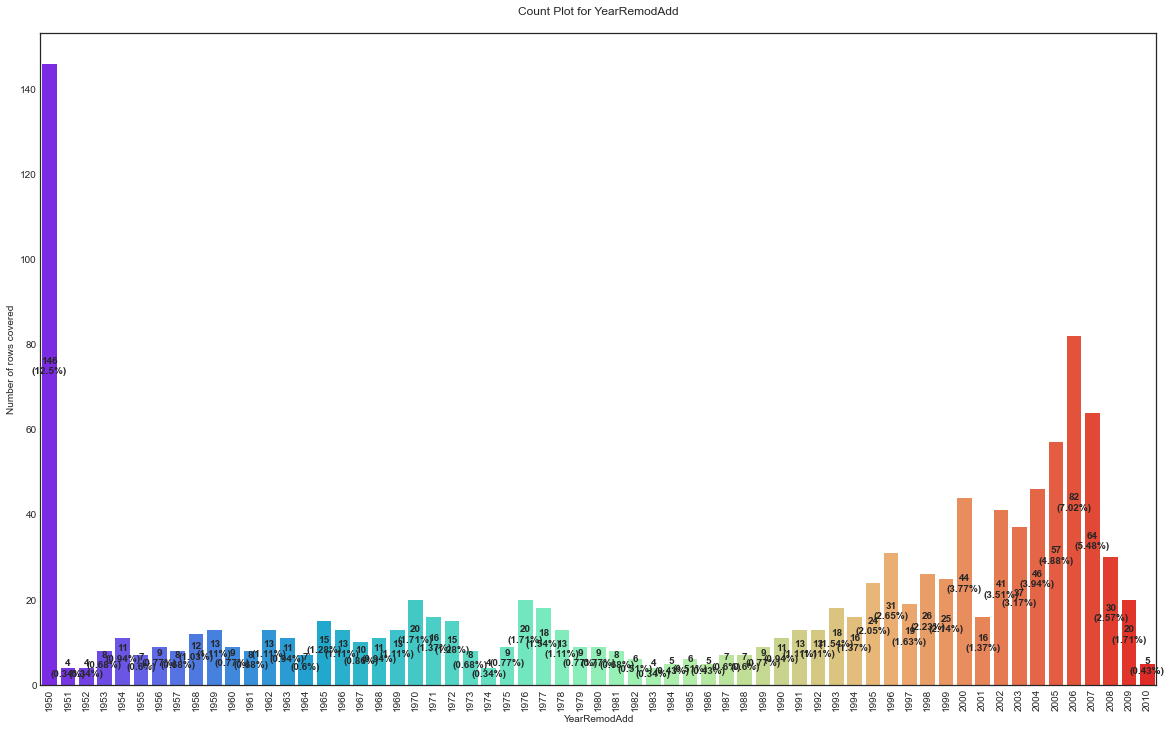

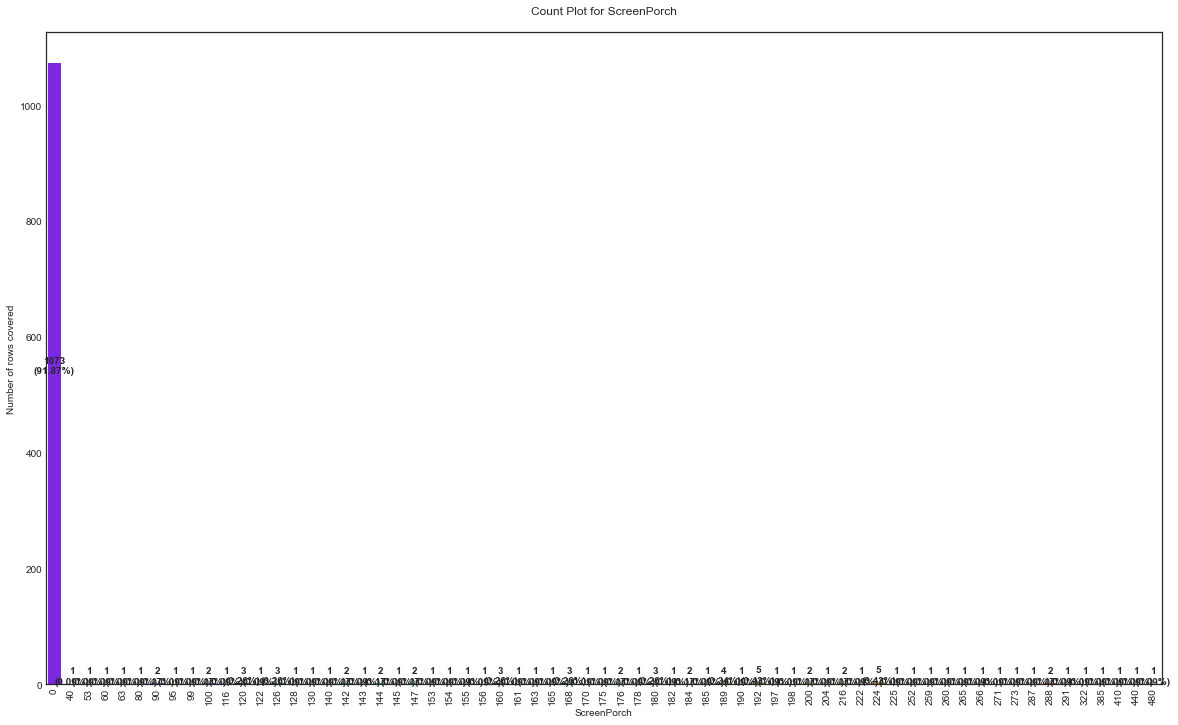

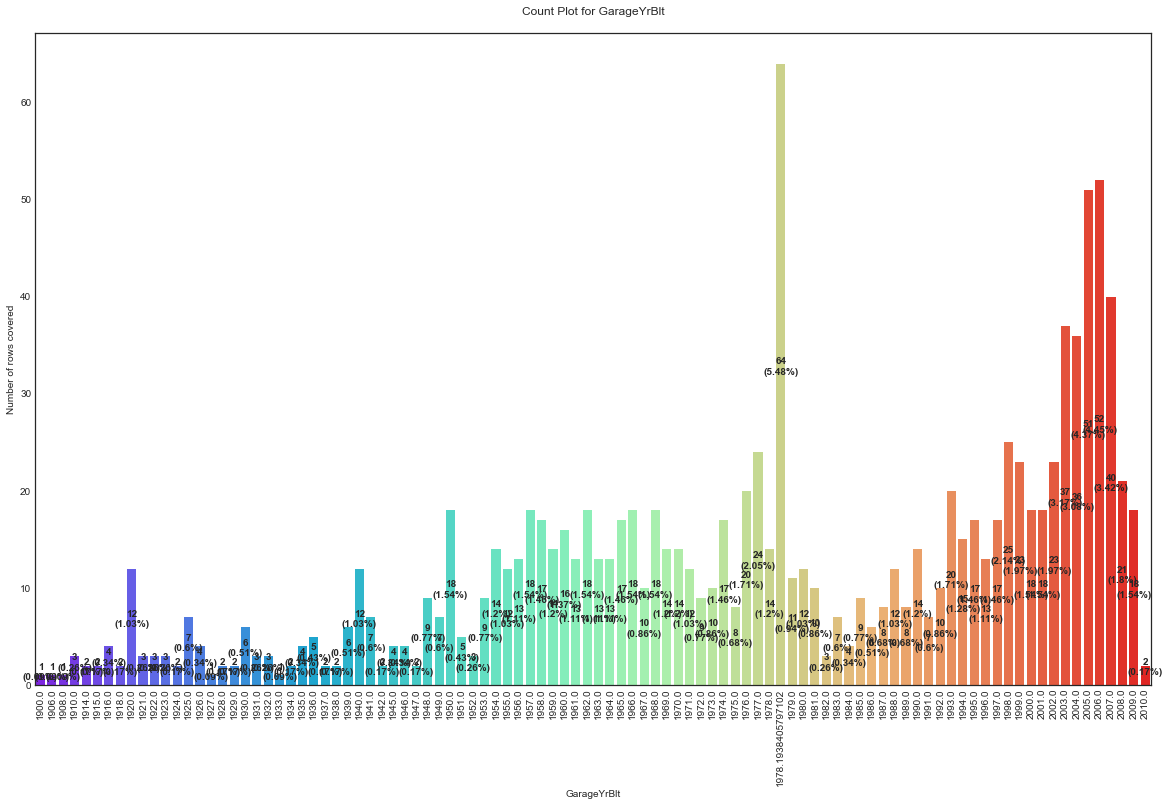

In [22]:
for col in train_df[double]:
    plt.figure(figsize=(20,12))
    col_name = col
    values = train_df[col_name].value_counts()
    index = 0
    ax = sns.countplot(train_df[col_name], palette="rainbow")

    for i in ax.patches:
        h = i.get_height() # getting the count of each value
        t = len(train_df[col_name]) # getting the total number of records using length
        s = f"{h}\n({round(h*100/t,2)}%)" # making the string for displaying in count bar
        plt.text(index, h/2, s, ha="center", fontweight="bold")
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.xlabel(col_name)
    plt.ylabel(f"Number of rows covered")
    plt.xticks(rotation=90)
    plt.show()

## Observations:

- for feature MSSubClass:
•   Maximum number of records are available for 20.
•   Minimum number of records are available for 40.
•   Majority of records are for 20, 60, 50 & 120.
- for feature MSZoning:
•   Maximum number of records are available for RL.
•   Minimum number of records are available for C(all).
- for feature Street:
•   Maximum number of records are available for Pave.
•   Minimum number of records are available for Grvl.
- for feature LotShape:
•   Maximum number of records are available for Reg.
•   Minimum number of records are available for IR3.
•   Majority of records are for Reg & IR1.
- for feature LandContour:
•   Maximum number of records are available for Lvl.
•   Minimum number of records are available for Low.
- for feature Utilities:
•   All of the records are for AllPub and hence, this feature can be dropped from the dataset as it is of no use.
- for feature LotConfig:
•   Maximum number of records are available for Inside.
•   Minimum number of records are available for FR3.
- for feature LandSlope:
•   Maximum number of records are available for Gtl.
•   Minimum number of records are available for Sev.
- for feature Neighborhood:
•   Maximum number of records are available for NAmes.
•   Minimum number of records are available for Blueste.
•   Majority of records are for NAmes, CollgCr, OldTown, Edwards, Somerst, Gilbert, Sawyer, NWAmes and NridgHt.
- for feature Condition1:
•   Most of the records are for Norm.
- for feature Condition2:
•   Most of the records are for Norm.
- for feature BldgType:
•   Most of the records are for 1Fam.
- for feature HouseStyle:
•   Most of the records are for 1Story and 2Story.
- for feature OverallQual:
•   Most of the records are for 5, 6, 7, 8, & 4.
- for feature OverallCond:
•   Most of the records are for 5, 6, 7.
- for feature RoofStyle:
•   Most of the records are for Gable.
- for feature RoofMatl:
•   Most of the records are for CompShg.
- for feature Exterior1st:
•   Most of the records are for VinylSd, HdBoard, MetalSd, Wd Sdng & Plywood.
- for feature Exterior2nd:
•   Most of the records are for VinylSd, HdBoard, MetalSd, Wd Sdng & Plywood.
- for feature MasVnrType:
•   Most of the records are for None and BrkFace.
- for feature ExterQual:
•   Most of the records are for TA & Gd.
- for feature ExterCond:
•   Most of the records are for TA.
- for feature Foundation:
•   Most of the records are for CBlock and PConc
- for feature BsmtQual:
•   Most of the records are for TA & Gd.
- for feature BsmtCond:
•   Most of the records are for TA.
- for feature BsmtExposure:
•   Most of the records are for No.
- for feature BsmtFinType1:
•   Most of the records are for Unf, GLQ and ALQ.
- for feature BsmtFinType2:
•   Most of the records are for Unf.
- for feature Heating:
•   Most of the records are for GasA.
- for feature HeatingQC:
•   Most of the records are for Ex, TA and Gd.
- for feature CentralAir:
•   Most of the records are for Y.
- for feature Electrical:
•   Most of the records are for SBrkr.
- for feature KitchenQual:
•   Most of the records are for TA & Gd.
- for feature Functional:
•   Most of the records are for Typ.
- for feature GarageType:
•   Most of the records are for Attchd and Detchd.
- for feature GarageFinish:
•   Most of the records are for Unf.
- for feature GarageQual:
•   Most of the records are for TA.
- for feature GarageCond:
•   Most of the records are for TA.
- for feature PavedDrive:
•   Most of the records are for Y.
- for feature SaleType:
•   Most of the records are for WD.
- for feature SaleCondition:
•   Most of the records are for Normal.

# Scatterplot for triple digit features

Scatter plot for EnclosedPorch column with respect to the rows covered ->


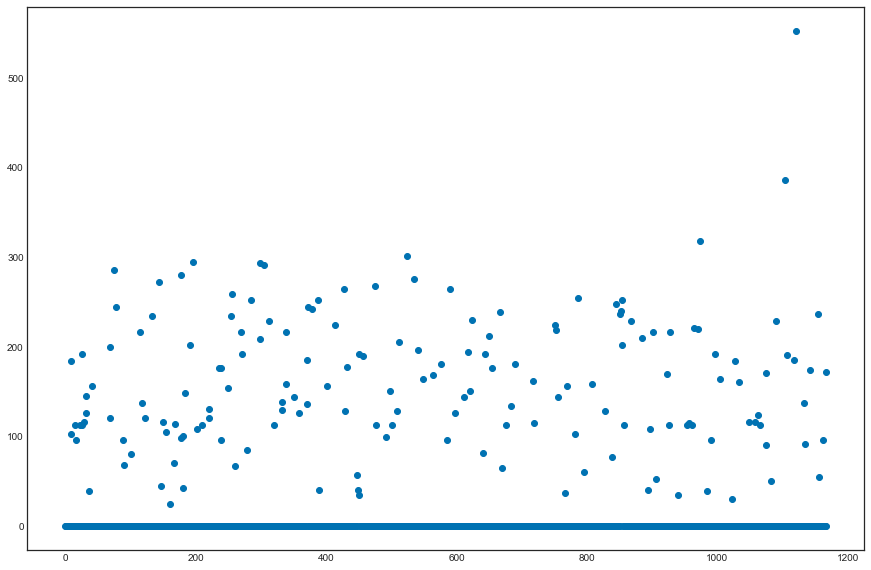

Scatter plot for LotFrontage column with respect to the rows covered ->


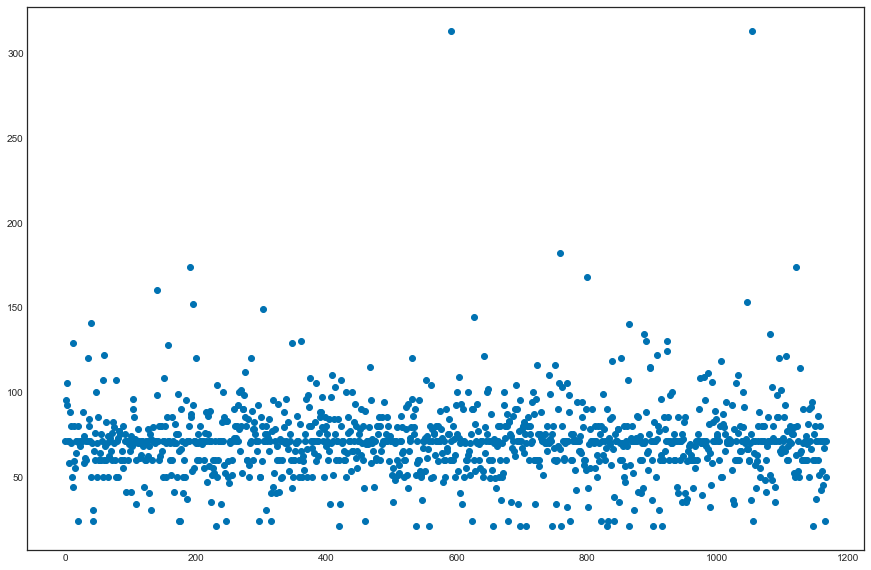

Scatter plot for YearBuilt column with respect to the rows covered ->


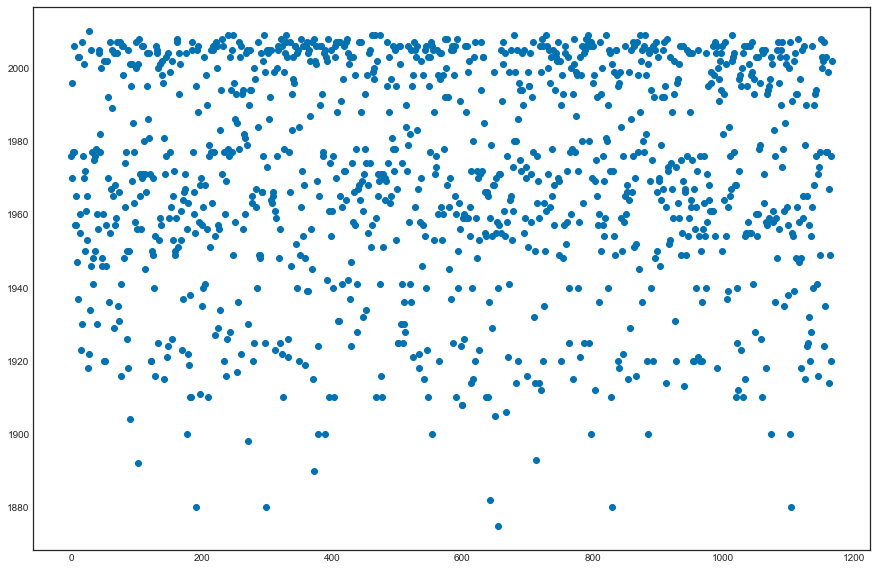

Scatter plot for BsmtFinSF2 column with respect to the rows covered ->


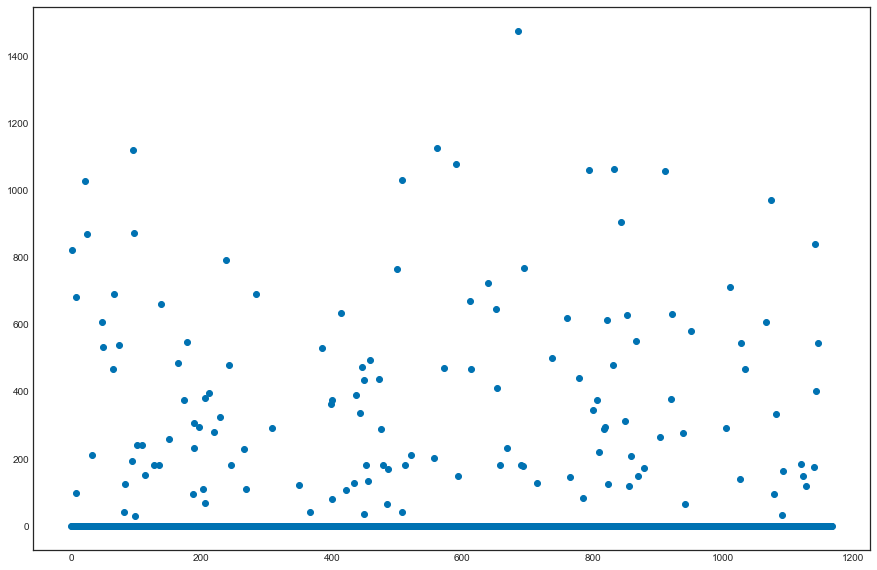

Scatter plot for OpenPorchSF column with respect to the rows covered ->


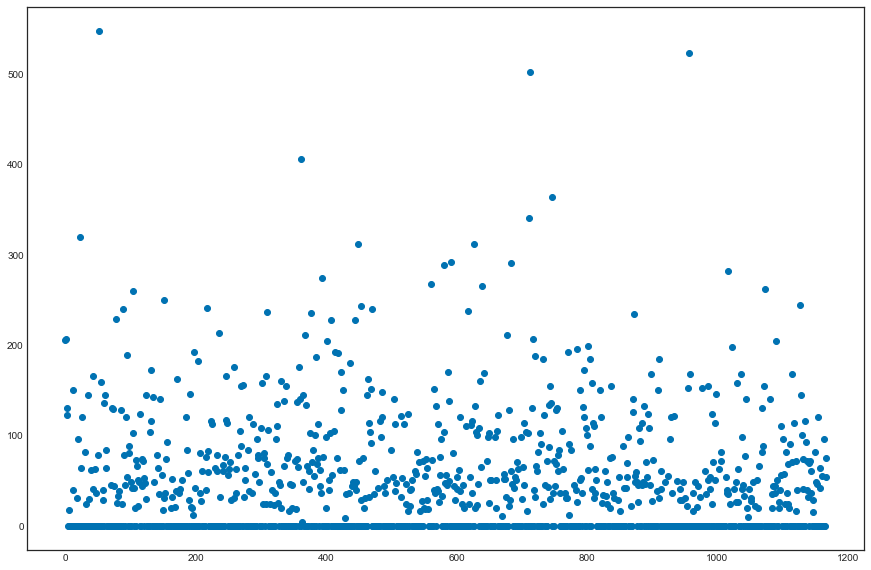

Scatter plot for WoodDeckSF column with respect to the rows covered ->


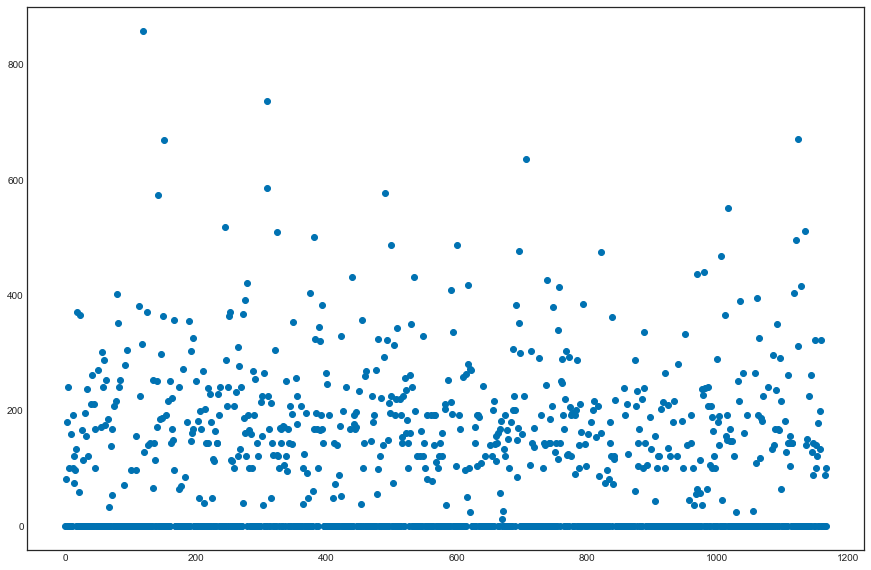

Scatter plot for MasVnrArea column with respect to the rows covered ->


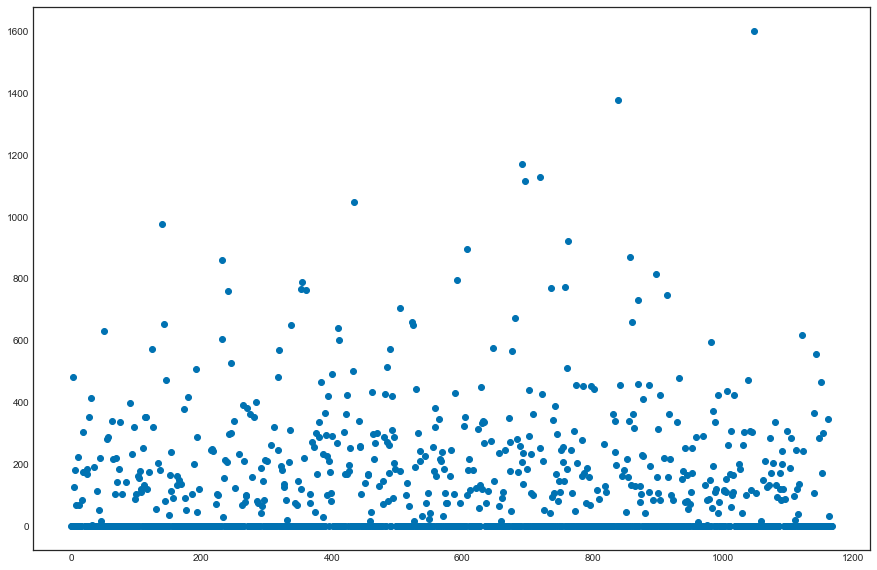

Scatter plot for 2ndFlrSF column with respect to the rows covered ->


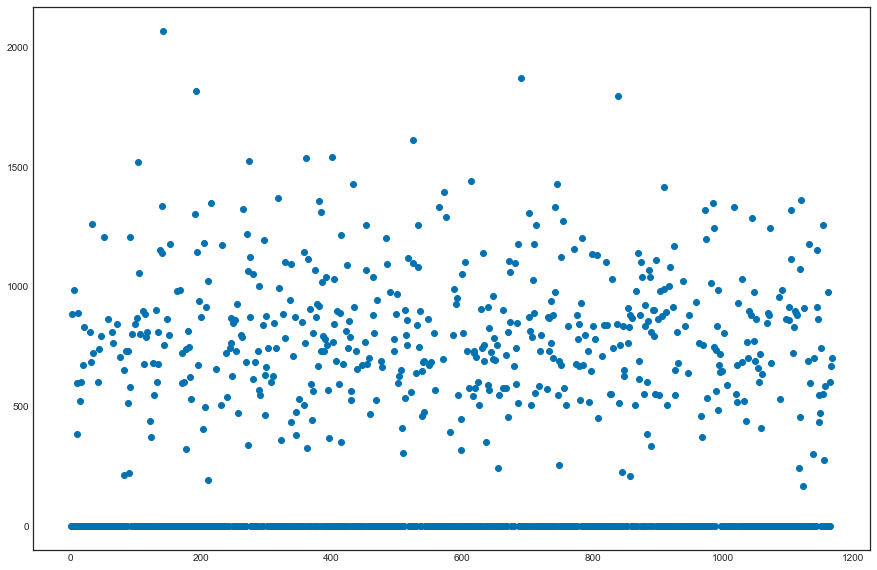

Scatter plot for GarageArea column with respect to the rows covered ->


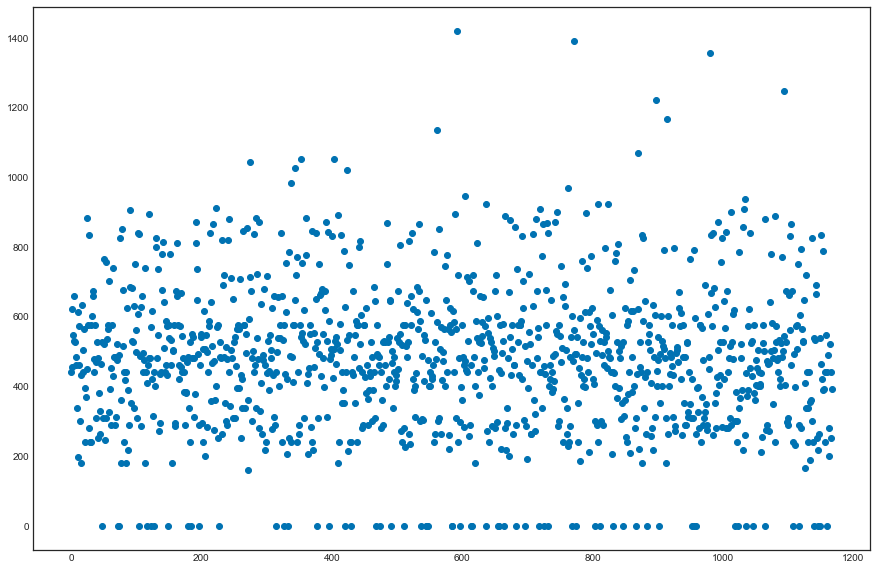

Scatter plot for BsmtFinSF1 column with respect to the rows covered ->


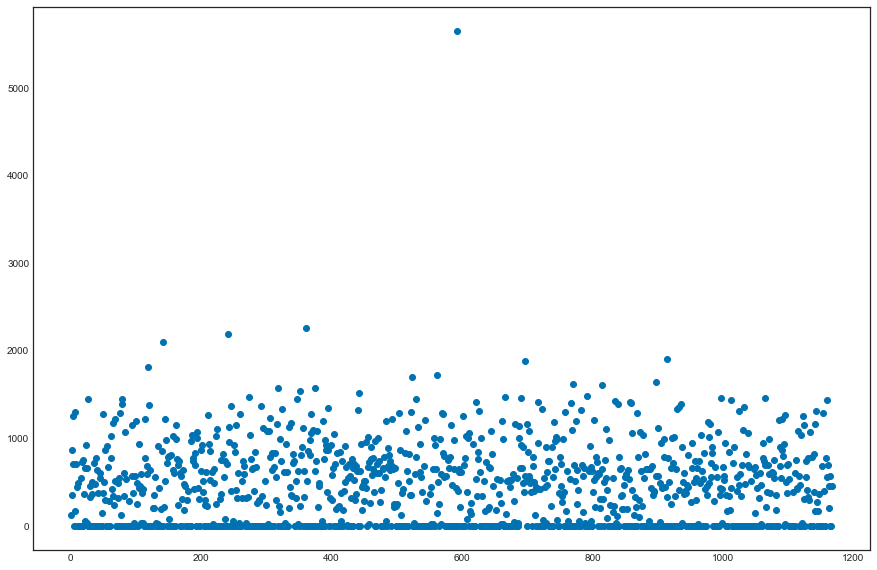

Scatter plot for SalePrice column with respect to the rows covered ->


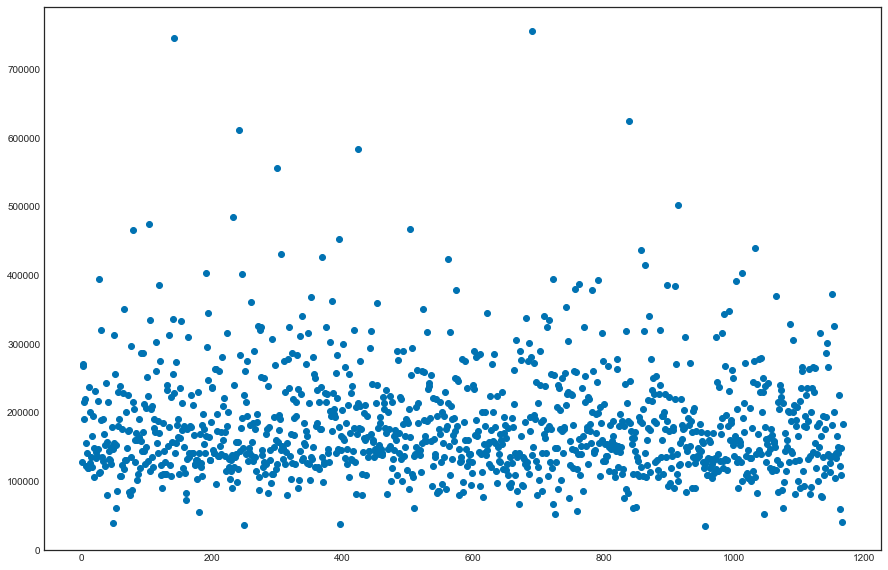

Scatter plot for TotalBsmtSF column with respect to the rows covered ->


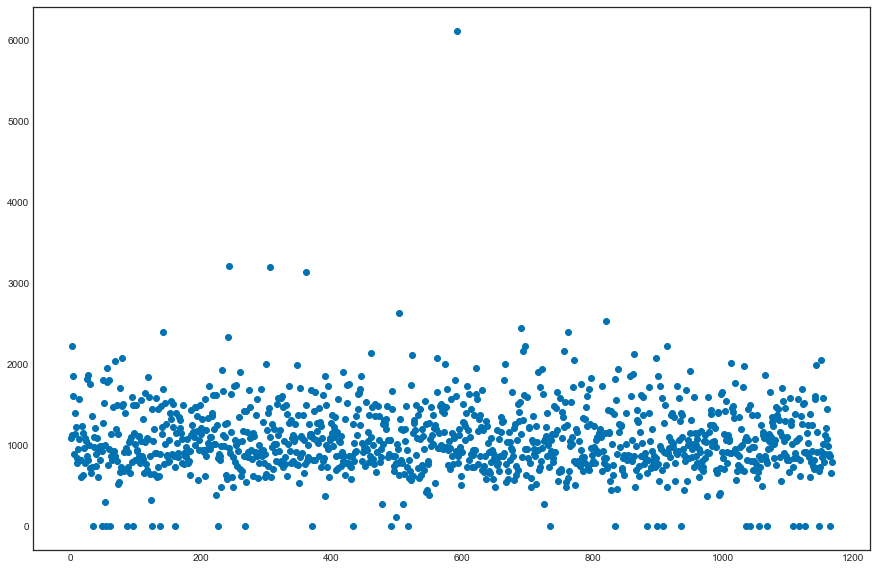

Scatter plot for 1stFlrSF column with respect to the rows covered ->


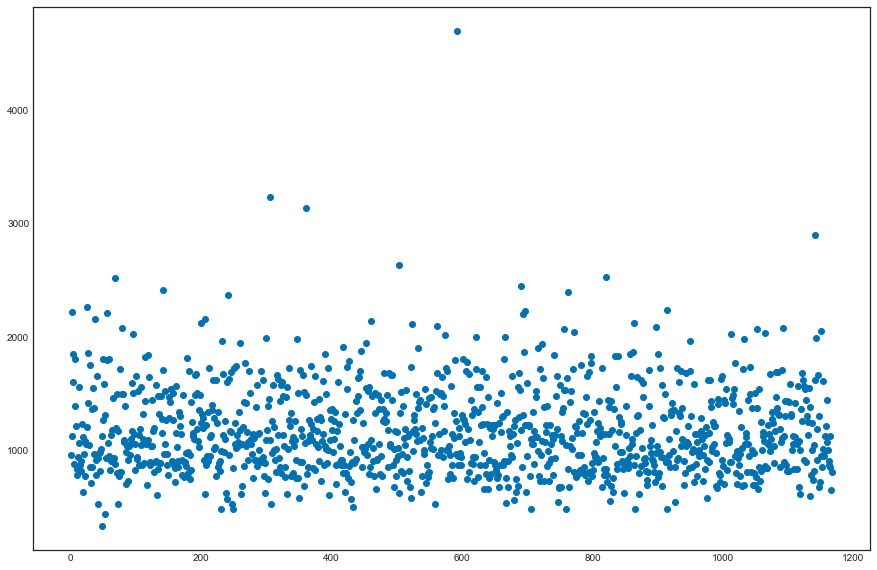

Scatter plot for BsmtUnfSF column with respect to the rows covered ->


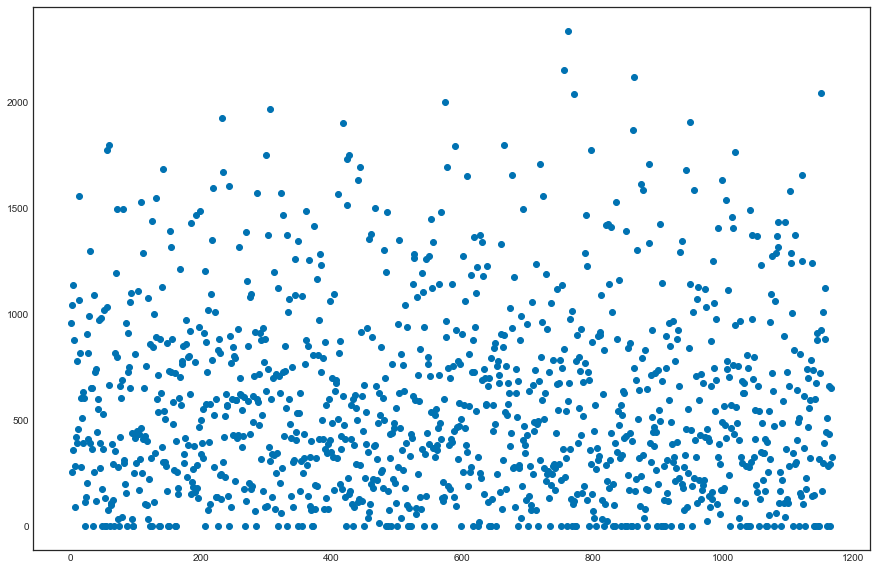

Scatter plot for GrLivArea column with respect to the rows covered ->


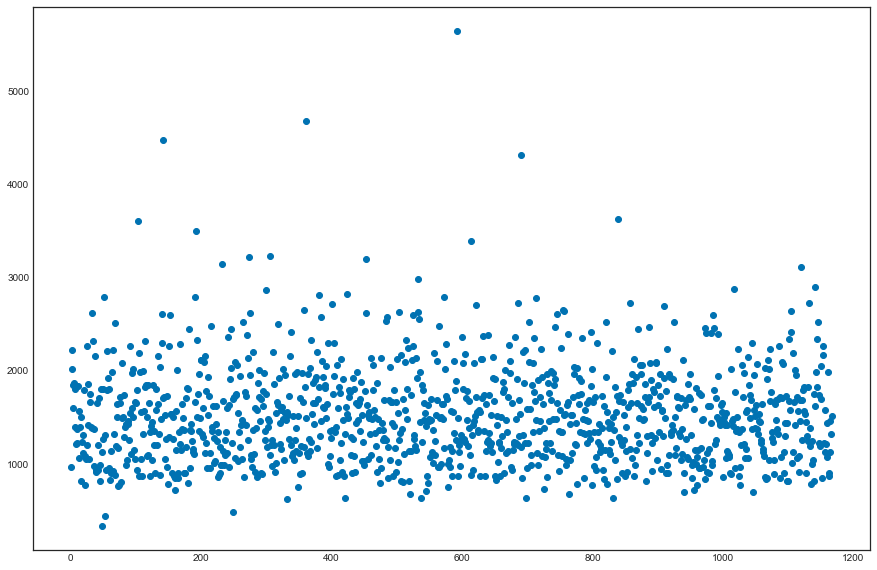

Scatter plot for LotArea column with respect to the rows covered ->


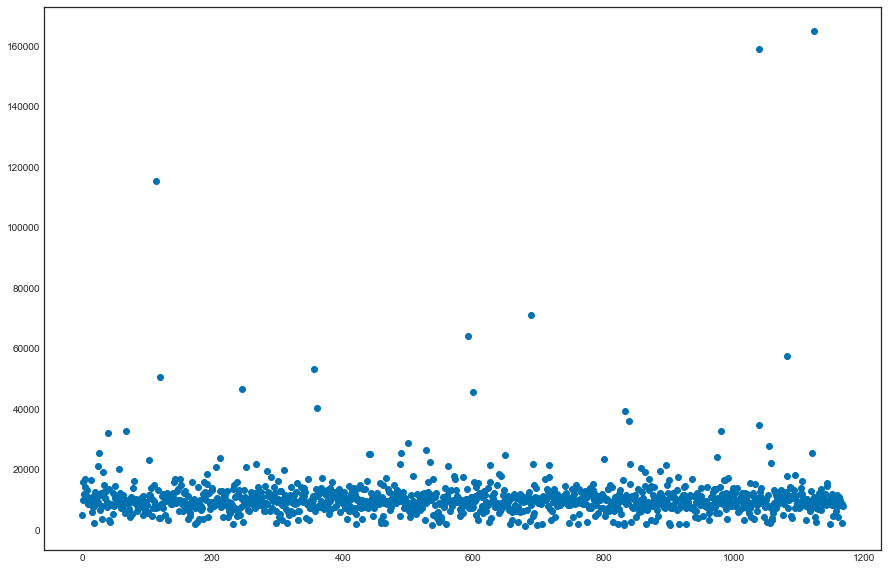

In [23]:
plt.style.use('seaborn-colorblind')
for j in train_df[triple]:
    plt.figure(figsize=(15,10))
    print(f"Scatter plot for {j} column with respect to the rows covered ->")
    plt.scatter(train_df.index, train_df[j])
    plt.show()

### Observations:

-> Maximum standard deviation of 8957.44 is observed in LotArea column. -> Maximum SalePrice of a house observed is 755000 and minimum is 34900. -> In the columns MSSubclass, LotArea, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfsF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, HalfBath, TotRmsAbvGrd, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, Miscval, salePrice mean is considerably greater than median so the columns are positively skewed. -> In the columns FullBath, BedroomAbvGr, Fireplaces, Garagecars, GarageArea, YrSold Median is greater than mean so the columns are negatively skewed. -> In the columns MSSubClass, LotFrontage, LotArea, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtHalfBath, BedroomAbvGr, ToRmsAbvGrd, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, MiscVal, SalePrice there is considerable difference between the 75 percentile and maximum so outliers are present.

histogram

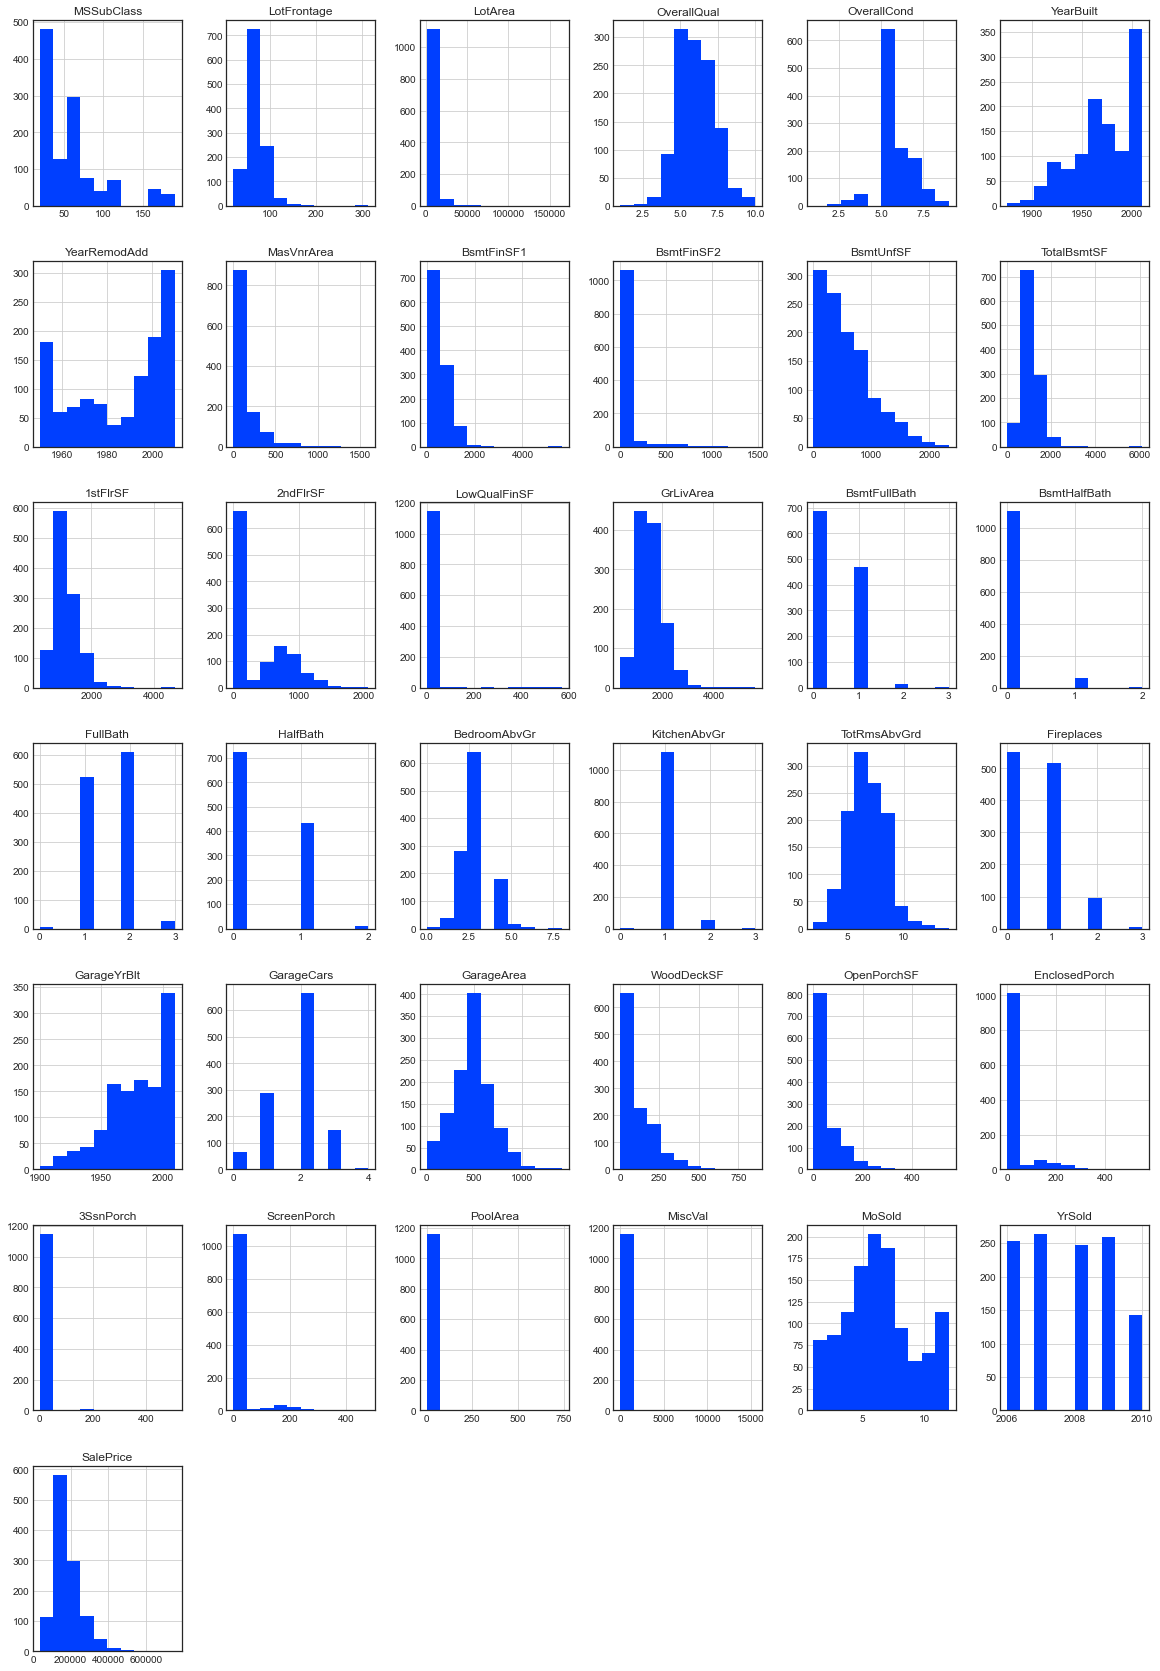

In [24]:
plt.style.use('seaborn-bright')

train_df.hist(figsize=(20,30))
plt.show()

-> lotFrontage: Almost every house has a lotfrontage of 20 to 150 feet. Around 580 houses have lots ranging from 0 to 10,000 square feet. Only a few residences have lots measuring between 120000 and 160000 square feet. OverallQual: Rates the house's overall material and finish-: Approximately 300 homes were sold in average condition. Only about ten to fifteen properties were in outstanding shape. -> YearBuilt: Original construction date-: More individuals have moved into residences built after 1990. MasVnrArea: Masonry veneer area in square feet-:50% of houses have a Masonry veneer area of '0-50,' while the remaining 50% of dwellings have a Masonry veneer area of 50-1200. -> BsmtFinSF1: Type 1 completed square feet-: Most houses have Type 1 finished square feet area of basement between 0 and 1500 -> BsmtFinSF2: Type 2 finished square feet-: Around 1000 houses have Type 2 finished square feet area of basement between 0 and 1500.Type 2 finished square feet-: Approximately 1000 dwellings have a Type 2 finished square feet area of 0 -> Unfinished square feet of basement area-: Around 130 residences have unfinished basements ranging in size from 100 to 500 square feet -> 1stFlrSF: First Floor Square Feet-: Around 280 houses have a first floor square feet size ranging from 800 to 1200 square feet -> GrLivArea: Above-ground (ground) living area square feet—Most residences have above-ground living space square feet ranging from 800 to 3000 -> BsmtFullBath: Basement full bathrooms—50 percent of houses have no full bathrooms in the basement, the rest have one full bathroom, and only a few have two full bathrooms in the basement -> FullBath: Full bathrooms above grade—25 percent of residences have one full bathroom above ground, 50 percent have two full bathrooms above ground, and 25 percent have three full bathrooms above ground.200 to 800 -> woodDeckSF: Wood deck area in square feet-: More than half of all residences have no wood deck, while the rest have between 0 and 400 square feet. -> OpenPorchSF: Open porch space in square feet-: 25% of houses have no open porch sqft area, while the remainder have between 0 and 300 sqft. -> Almost all houses have 0 enclosed porch sqft area. ScreenPorch: Screen porch area in square feet-: Almost every house has 0 sqft of screen porch area -> The sale price of approximately 500 residences ranges from $100,000 to $200,000,000. Only a few houses sell for 600,000 to 700,000 dollars.

# Correlation using a Heatmap

Positive correlation - A correlation of +1 indicates a perfect positive correlation, meaning that both variables move in the same direction together.
Negative correlation - A correlation of –1 indicates a perfect negative correlation, meaning that as one variable goes up, the other goes down

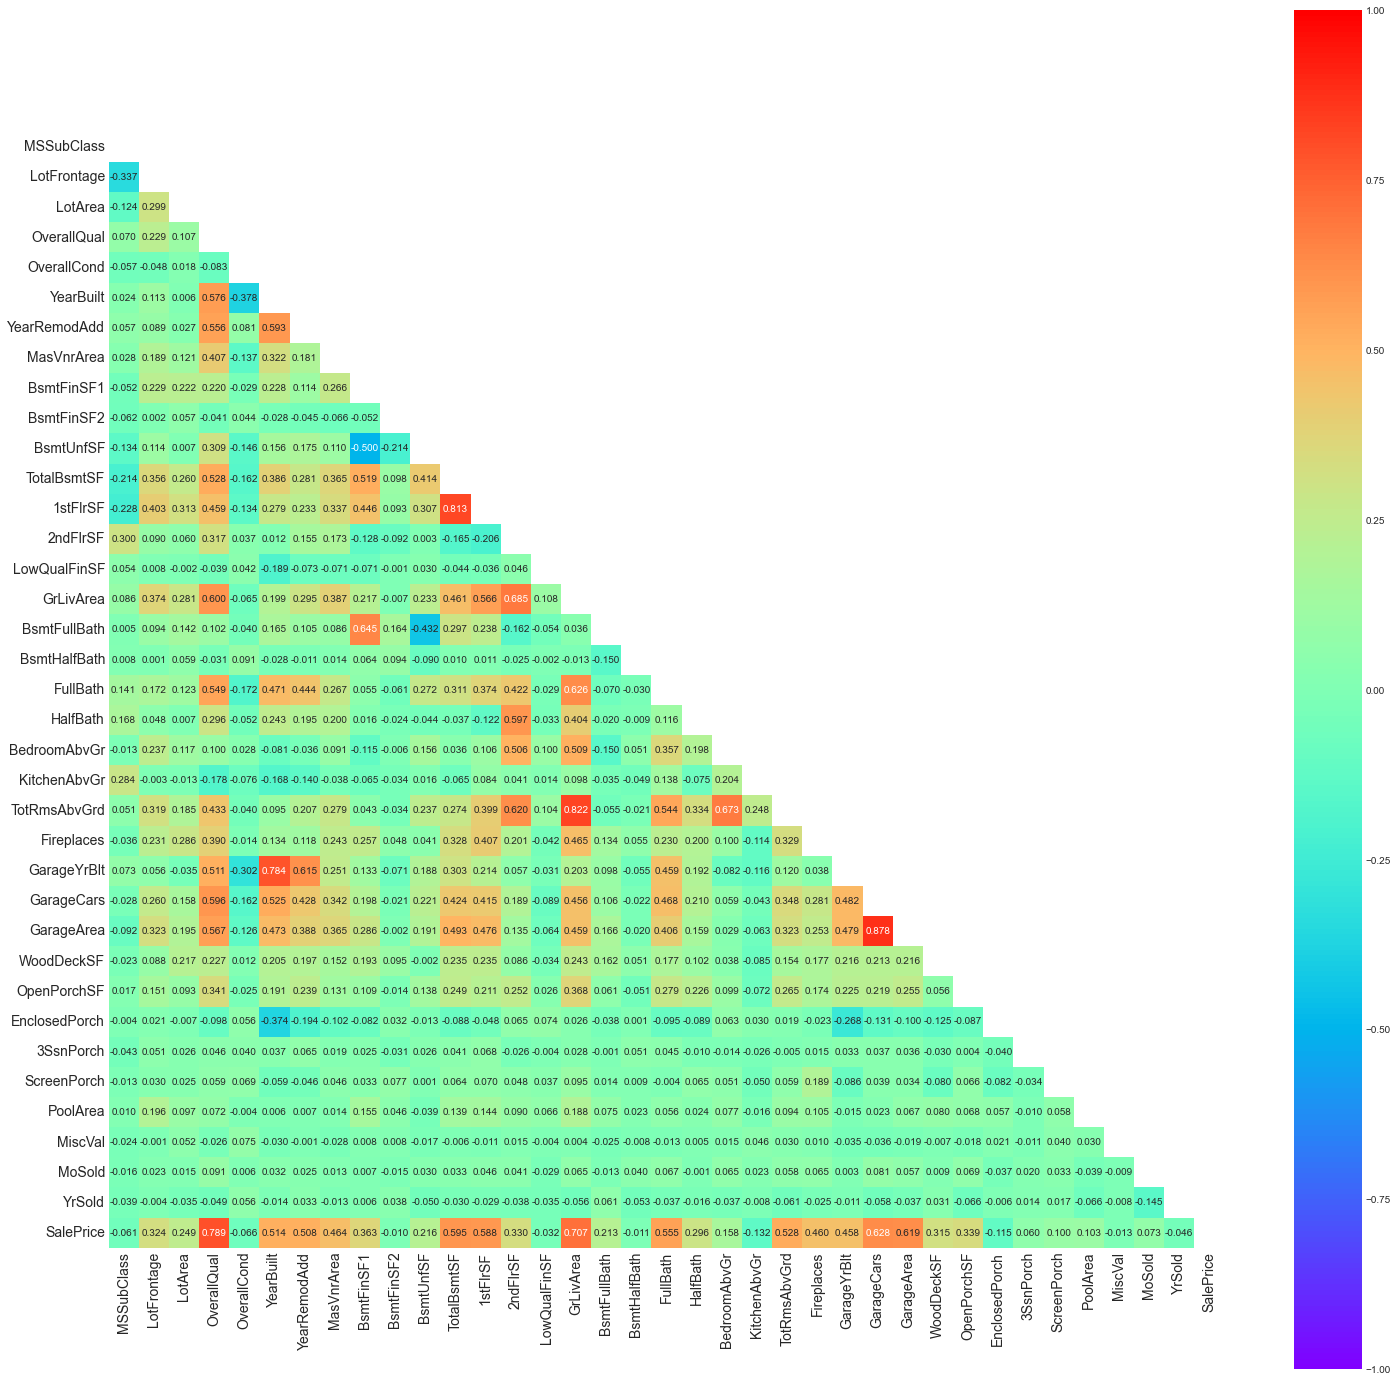

In [25]:
upper_triangle = np.triu(train_df.corr())
plt.figure(figsize=(25,25))
sns.heatmap(train_df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="rainbow", mask=upper_triangle)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

### Observations: 

- 'MSSubClass','OverallCond','LowQualFinSF','BsmtHalfBath','KitchenAbvGr','YrSold','EnclosedPorch','MiscVal' are all negatively connected with the target column, whereas the rest are all favourably correlated.

- 'OverallQual' and 'GrLivArea' have a strong positive relationship with the goal column.

- 'MSSubClass,'OverallCond,'OverallCond,'LowQualFinSF,'BsmtHalfBath,'YrSold,'MiscVal,'MoSold,'3SsnPorch' are the least connected with the target column.

# Encoding

I have used ordinal encoder to convert my object datatype to float

In [26]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()
def ordinal_encode(df, column):
    df[column] = oe.fit_transform(df[column])
    return df

df=ordinal_encode(train_df, object_datatype)
df

MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
0            120       3.0     70.98847     4928     1.0       0.0   
1             20       3.0     95.00000    15865     1.0       0.0   
2             60       3.0     92.00000     9920     1.0       0.0   
3             20       3.0    105.00000    11751     1.0       0.0   
4             20       3.0     70.98847    16635     1.0       0.0   
5             60       3.0     58.00000    14054     1.0       0.0   
6             20       3.0     70.98847    11341     1.0       0.0   
7             20       3.0     88.00000    13125     1.0       3.0   
8             20       3.0     70.00000     9170     1.0       3.0   
9             50       3.0     80.00000     8480     1.0       3.0   
10            50       4.0     50.00000     8600     1.0       3.0   
11            60       3.0     44.00000     9548     1.0       0.0   
12            20       3.0    129.00000     9196     1.0       0.0   
13            20       3.0     80.00000     8892     1.0       0.0   
14            50       3.0     59.00000    16466     1.0       0.0   
15            70       3.0     55.00000    10592     1.0       3.0   
16            30       4.0     70.98847     5890     1.0       3.0   
17            20       3.0     64.00000     7314     1.0       3.0   
18            20       3.0     70.98847     7917     1.0       0.0   
19           160       4.0     24.00000     2016     1.0       3.0   
20            60       3.0     80.00000    12435     1.0       3.0   
21            85       3.0     70.00000     8445     1.0       3.0   
22            20       3.0     68.00000     9717     1.0       3.0   
23            20       3.0     70.98847    10659     1.0       0.0   
24            20       3.0     71.00000     9230     1.0       3.0   
25            20       3.0     70.98847    21000     1.0       3.0   
26            30       3.0     70.98847    25339     1.0       3.0   
27            20       3.0     88.00000    11394     1.0       3.0   
28            45       4.0     58.00000     6380     1.0       3.0   
29            70       3.0     74.00000    11988     1.0       0.0   
30           120       3.0     61.00000     7658     1.0       3.0   
31            60       4.0     60.00000     3378     1.0       3.0   
32            90       3.0     70.98847    18890     1.0       0.0   
33            50       4.0     70.98847    12358     1.0       0.0   
34            60       3.0     70.98847    14762     1.0       1.0   
35            20       3.0    120.00000    10356     1.0       3.0   
36            20       3.0     80.00000    10400     1.0       3.0   
37            20       3.0     84.00000    12615     1.0       3.0   
38            85       3.0     70.98847     7540     1.0       0.0   
39            40       4.0     50.00000     9100     1.0       3.0   
40            20       3.0    141.00000    31770     1.0       0.0   
41            20       3.0     70.00000    13300     1.0       3.0   
42           160       1.0     30.00000     3180     1.0       3.0   
43           160       4.0     24.00000     2522     1.0       3.0   
44            80       3.0     65.00000     8385     1.0       3.0   
45            20       3.0     76.00000     8314     1.0       3.0   
46            60       3.0     60.00000     8123     1.0       0.0   
47            20       4.0    100.00000    12000     1.0       3.0   
48            20       3.0     50.00000     5000     1.0       3.0   
49            20       3.0     70.00000     7931     1.0       3.0   
50            20       3.0     85.00000    14331     1.0       3.0   
51            50       4.0     60.00000    10440     1.0       3.0   
52            30       3.0     60.00000     8400     1.0       3.0   
53            20       3.0     64.00000     8712     1.0       0.0   
54            20       3.0     60.00000    11100     1.0       3.0   
55            20       3.0     75.00000     9742     1.0       3.0   
56            20

we have successfully encoded our categorical data into numerical data

In [27]:
df.dtypes

MSSubClass         int64
MSZoning         float64
LotFrontage      float64
LotArea            int64
Street           float64
LotShape         float64
LandContour      float64
LotConfig        float64
LandSlope        float64
Neighborhood     float64
Condition1       float64
Condition2       float64
BldgType         float64
HouseStyle       float64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle        float64
RoofMatl         float64
Exterior1st      float64
Exterior2nd      float64
MasVnrType       float64
MasVnrArea       float64
ExterQual        float64
ExterCond        float64
Foundation       float64
BsmtQual         float64
BsmtCond         float64
BsmtExposure     float64
BsmtFinType1     float64
BsmtFinSF1         int64
BsmtFinType2     float64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating          float64
HeatingQC        float64
CentralAir       float64
Electrical       float64


# Box Plot

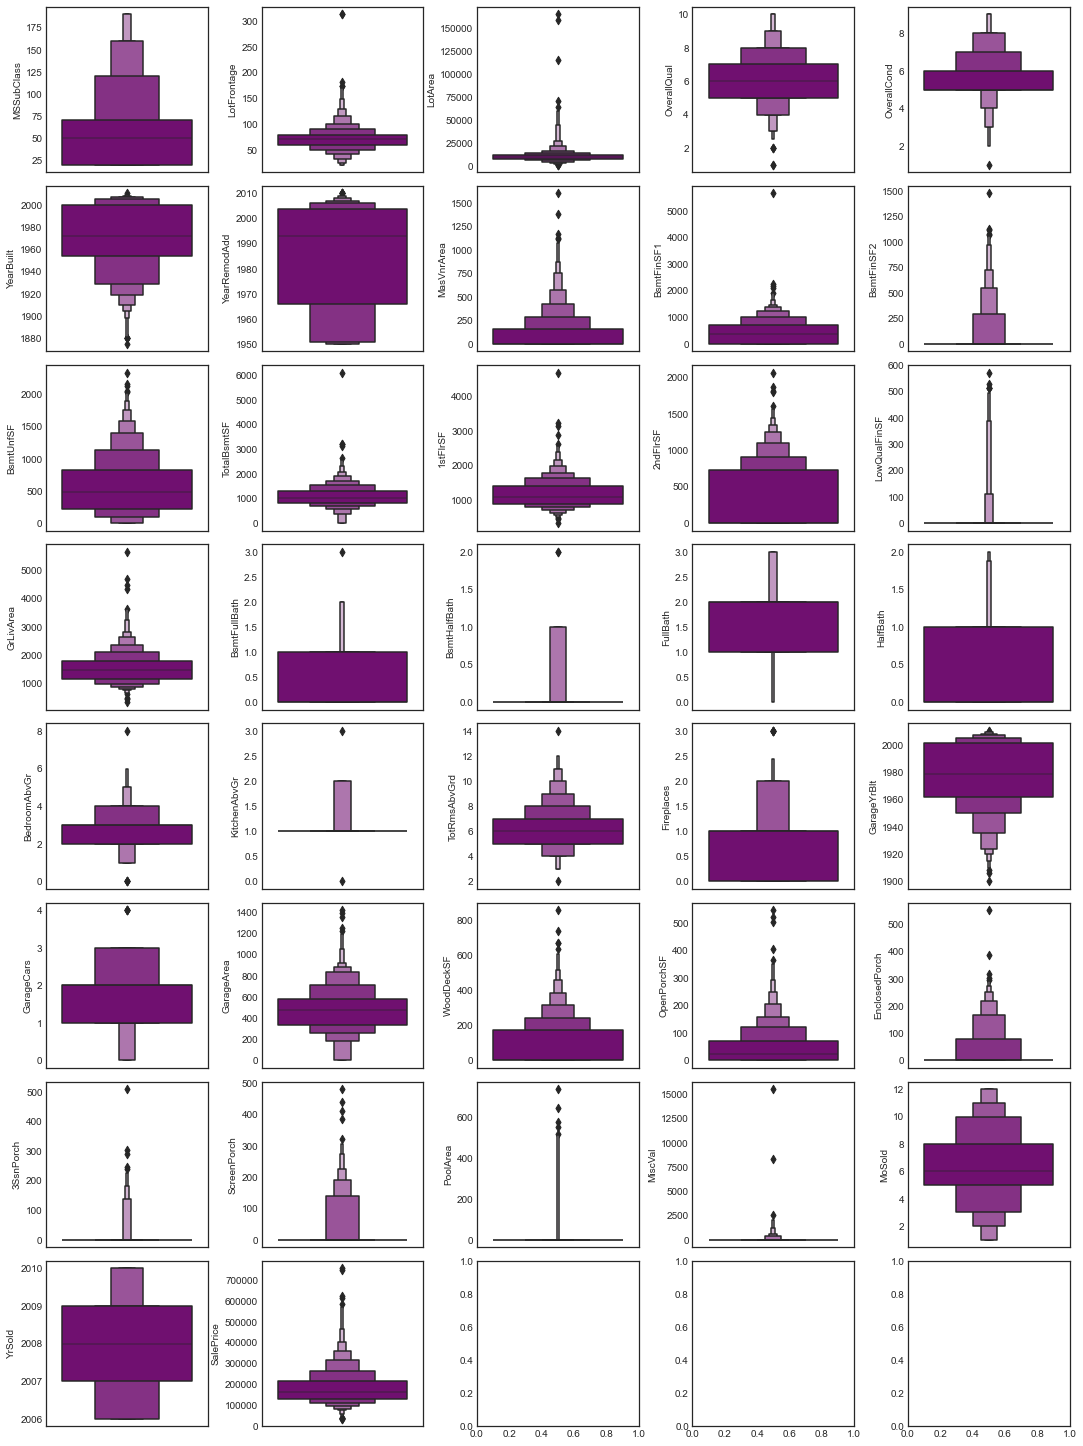

In [28]:
plt.style.use('fast')

fig, ax = plt.subplots(ncols=5, nrows=8, figsize=(15,20))
index = 0
ax = ax.flatten()
for col, value in df[numeric_datatype].items():
    sns.boxenplot(y=col, data=df, ax=ax[index], color="purple")
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

We can observe some outlier features using the boxen plot, but when I tried to eliminate outliers, I lost roughly 58 percent of the data, so I chose to keep what I had.

# Handling Skewness

In [29]:
df.skew()

MSSubClass        1.422019
MSZoning         -1.796785
LotFrontage       2.710383
LotArea          10.659285
Street          -17.021969
LotShape         -0.603775
LandContour      -3.125982
LotConfig        -1.118821
LandSlope         4.812568
Neighborhood      0.043735
Condition1        3.008289
Condition2       11.514458
BldgType          2.318657
HouseStyle        0.285680
OverallQual       0.175082
OverallCond       0.580714
YearBuilt        -0.579204
YearRemodAdd     -0.495864
RoofStyle         1.498560
RoofMatl          7.577352
Exterior1st      -0.612816
Exterior2nd      -0.592349
MasVnrType       -0.104609
MasVnrArea        2.834658
ExterQual        -1.810843
ExterCond        -2.516219
Foundation       -0.002761
BsmtQual         -1.343781
BsmtCond         -3.293554
BsmtExposure     -1.166987
BsmtFinType1     -0.068901
BsmtFinSF1        1.871606
BsmtFinType2     -3.615783
BsmtFinSF2        4.365829
BsmtUnfSF         0.909057
TotalBsmtSF       1.744591
Heating          10.103609
H

We can observe that there are columns in our dataset that are above the permitted range of +/-0.5 value using the skew approach.

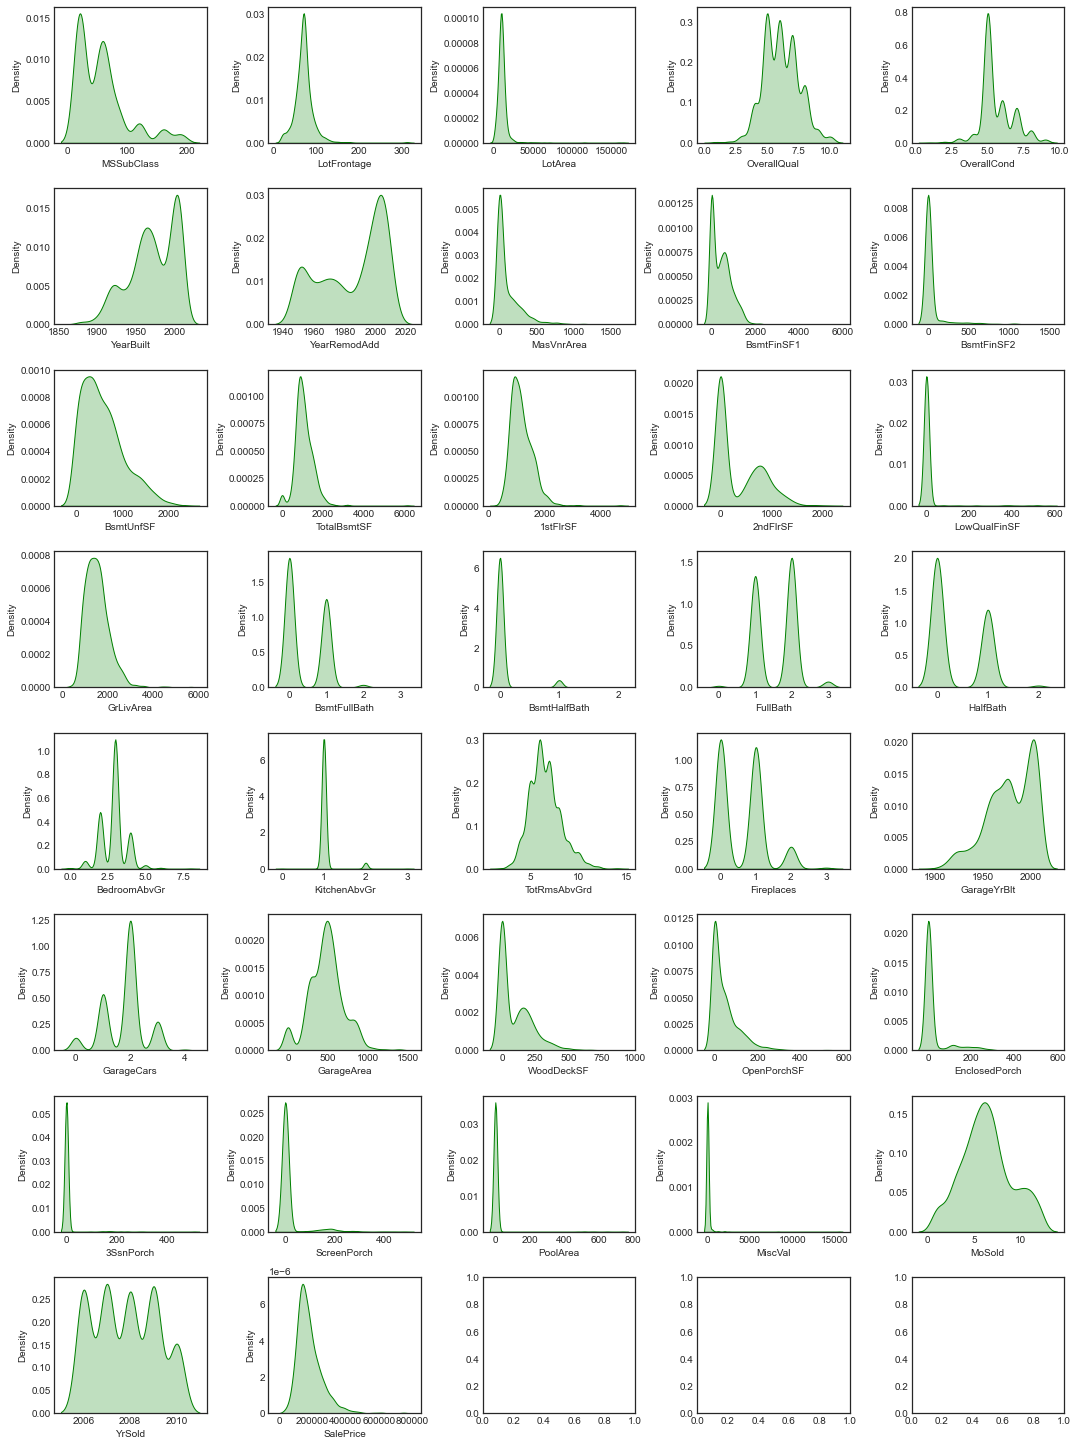

In [30]:
fig, ax = plt.subplots(ncols=5, nrows=8, figsize=(15,20))
index = 0
ax = ax.flatten()
for col, value in df[numeric_datatype].items():
    sns.distplot(value, ax=ax[index], hist=False, color="g", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

# Handling skewness using Log Transform

In [31]:
for col in df:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [32]:
df.skew()

MSSubClass        0.235373
MSZoning         -1.796785
LotFrontage      -0.815665
LotArea          -0.169107
Street          -17.021969
LotShape         -0.603775
LandContour      -3.125982
LotConfig        -1.118821
LandSlope         4.293508
Neighborhood      0.043735
Condition1       -1.004873
Condition2       -1.931453
BldgType          2.084699
HouseStyle        0.285680
OverallQual       0.175082
OverallCond      -0.418916
YearBuilt        -0.579204
YearRemodAdd     -0.495864
RoofStyle         1.164093
RoofMatl          7.016896
Exterior1st      -0.612816
Exterior2nd      -0.592349
MasVnrType       -0.104609
MasVnrArea        0.494344
ExterQual        -1.810843
ExterCond        -2.516219
Foundation       -0.002761
BsmtQual         -1.343781
BsmtCond         -3.293554
BsmtExposure     -1.166987
BsmtFinType1     -0.068901
BsmtFinSF1       -0.606859
BsmtFinType2     -3.615783
BsmtFinSF2        2.502785
BsmtUnfSF        -2.129882
TotalBsmtSF      -5.146574
Heating           7.792625
H

# Correlation Bar Plot comparing features with our label

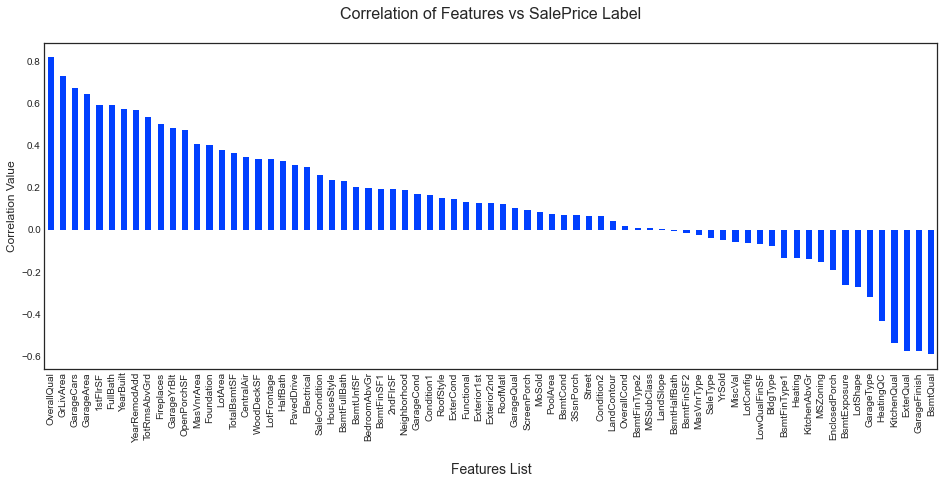

In [33]:
df_corr = df.corr()
plt.figure(figsize=(16,6))
df_corr['SalePrice'].sort_values(ascending=False).drop('SalePrice').plot.bar()
plt.title("Correlation of Features vs SalePrice Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

- SalePrice is highly positively correlated with the columns OverallQual, YearBuilt, YearRemodAdd, TotalBsmtSF, 1stFlrSF, GrLivArea, FullBath, TotRmsAbvGrd, GarageCars, GarageArea. 

-  SalePrice is negatively correlated with OverallCond, KitchenAbvGr, Encloseporch, YrSold.

# Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and label

In [34]:
X = df.drop('SalePrice', axis=1)
Y = df['SalePrice']

The dataset has been divided into features and labels, with X denoting all feature columns and Y denoting the target label column.

# Feature Scaling

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

MSSubClass  MSZoning  LotFrontage   LotArea    Street  LotShape  \
0    1.425708 -0.021646     0.146261 -1.217640  0.058621 -1.373107   
1   -1.131278 -0.021646     1.077391  1.097443  0.058621 -1.373107   
2    0.425677 -0.021646     0.974688  0.167631  0.058621 -1.373107   
3   -1.131278 -0.021646     1.397936  0.503038  0.058621 -1.373107   
4   -1.131278 -0.021646     0.146261  1.191291  0.058621 -1.373107   

   LandContour  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  \
0     0.318473   0.606420  -0.233561      0.142224    0.091105    0.009421   
1     0.318473   0.606420   3.662480     -0.024227    0.091105    0.009421   
2     0.318473  -1.220661  -0.233561      0.475125    0.091105    0.009421   
3     0.318473   0.606420  -0.233561      0.308675    0.091105    0.009421   
4     0.318473  -0.611634  -0.233561      0.308675    0.091105    0.009421   

   BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0  2.763118   -0.549930    -0.075169    -0.467514   0.168236     -0.421565   
1 -0.421512   -0.549930     1.364138     0.430962  -0.030885     -0.710356   
2 -0.421512    1.030838     0.644484    -0.467514   0.831975      0.589202   
3 -0.421512   -0.549930    -0.075169     0.430962   0.201423     -0.373434   
4 -0.421512   -0.549930    -0.075169     1.209257   0.201423      0.733598   

   RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  \
0  -0.461206 -0.134124    -0.212927    -0.104890    0.395209   -0.811066   
1  -2.823419  6.579098     1.079014     1.050880    0.395209   -0.811066   
2  -0.461206 -0.134124    -0.535912    -0.682775    0.395209   -0.811066   
3   1.901006 -0.134124    -0.212927    -0.104890   -1.241686    1.545296   
4  -0.461206 -0.134124    -1.504868    -1.549602    2.032104    1.037202   

   ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  \
0   0.671093   0.369322   -0.557836 -0.329500  0.293234      0.635539   
1  -0.759266  -2.318331    0.852451  0.836731 -2.672114     -1.113129   
2  -0.759266   0.369322    0.852451 -0.329500  0.293234     -1.987463   
3   0.671093   0.369322   -0.557836 -0.329500  0.293234      0.635539   
4  -0.759266   0.369322   -0.557836 -0.329500  0.293234      0.635539   

   BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0     -1.523529    0.192607      0.310141   -0.358502   0.657356     0.200480   
1     -1.523529    0.548995     -0.771186    3.277102   0.702538     0.826237   
2     -0.434828    0.848292      0.310141   -0.358502  -0.045315     0.231314   
3     -0.979178    0.781276      0.310141   -0.358502   0.749341     0.666338   
4     -1.523529    0.971138      0.310141   -0.358502   0.131619     0.544236   

    Heating  HeatingQC  CentralAir  Electrical  1stFlrSF  2ndFlrSF  \
0 -0.123143   1.390230    0.267506    0.299036 -0.470488 -0.870381   
1 -0.123143  -0.897602    0.267506    0.299036  2.179513 -0.870381   
2 -0.123143  -0.897602    0.267506    0.299036  0.042497  1.190178   
3 -0.123143  -0.897602    0.267506    0.299036  1.597577 -0.870381   
4 -0.123143   0.246314    0.267506    0.299036  1.153201 -0.870381   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0     -0.140523  -1.236391     -0.830761     -0.237506  0.793082 -0.778514   
1     -0.140523   1.295192      1.147062     -0.237506  0.793082 -0.778514   
2     -0.140523   1.003882      1.147062     -0.237506  0.793082  1.242838   
3     -0.140523   0.739261     -0.830761     -0.237506  0.793082 -0.778514   
4     -0.140523   0.314742     -0.830761      4.085500  0.793082 -0.778514   

   BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  \
0     -1.082679     -0.204183     0.806154     -0.983338    0.261146   
1      1.365664     -0.204183    -0.394851      0.944613    0.261146   
2      0.141492     -0.204183     0.806154      0.944613    0.261146   
3      0.141492     -0.204183     0.806154      0.384565    0.261146   
4      0.14

I'm scaling my feature data to make sure there's no data bias in one column, and instead, a standardisation will occur, allowing us to have a consistent dataset value.

# Finding the best random state for building Regression Models

importing necessary libraries

In [36]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [37]:
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=i)
    lr=LinearRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    r2 = r2_score(Y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best R2 score is", maxAccu,"on Random State", maxRS)

Best R2 score is 0.9201149048927508 on Random State 633


Here we see that out of the random state value ranging from 1 to 1000 the best random state number found is 663 and we will use this in our ML models

# Feature importance dataframe

In [38]:
rf=RandomForestRegressor()
rf.fit(X_train, Y_train)
importances = pd.DataFrame({'Features':X.columns, 'Importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('Importance', ascending=False).set_index('Features')
importances

Importance
Features                 
OverallQual         0.561
GrLivArea           0.111
GarageArea          0.040
TotalBsmtSF         0.035
1stFlrSF            0.033
BsmtFinSF1          0.020
CentralAir          0.018
GarageCars          0.012
LotArea             0.011
YearRemodAdd        0.011
YearBuilt           0.010
OverallCond         0.010
GarageFinish        0.010
Neighborhood        0.009
BsmtQual            0.008
LotFrontage         0.008
KitchenQual         0.006
2ndFlrSF            0.006
MasVnrArea          0.005
BsmtUnfSF           0.005
GarageType          0.004
GarageYrBlt         0.004
Fireplaces          0.004
OpenPorchSF         0.004
MSZoning            0.003
MoSold              0.003
WoodDeckSF          0.003
BsmtFinType1        0.003
FullBath            0.003
TotRmsAbvGrd        0.002
LotShape            0.002
BedroomAbvGr        0.002
PavedDrive          0.002
LandContour         0.002
ExterCond           0.002
Exterior2nd         0.002
Exterior1st         0.002
YrSold              0.002
EnclosedPorch       0.002
MSSubClass          0.002
Functional          0.001
KitchenAbvGr        0.001
SaleType            0.001
HalfBath            0.001
SaleCondition       0.001
ExterQual           0.001
Foundation          0.001
BldgType            0.001
HouseStyle          0.001
BsmtFullBath        0.001
RoofStyle           0.001
LandSlope           0.001
MasVnrType          0.001
Condition1          0.001
BsmtCond            0.001
BsmtExposure        0.001
BsmtFinType2        0.001
LotConfig           0.001
HeatingQC           0.001
Electrical          0.001
ScreenPorch         0.000
MiscVal             0.000
Street              0.000
PoolArea            0.000
BsmtHalfBath        0.000
GarageQual          0.000
3SsnPorch           0.000
Condition2          0.000
GarageCond          0.000
RoofMatl            0.000
BsmtFinSF2          0.000
LowQualFinSF        0.000
Heating             0.000

While predicting our label variable, the columns in the above cell are ordered in descending order according to their importance weightage.

# Machine Learning Model for Regression with Evaluation Metrics

In [39]:
def reg(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=663)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # RMSE - a lower RMSE score is better than a higher one
    rmse = mean_squared_error(Y_test, pred, squared=False)
    print("RMSE Score is:", rmse)
    
    # R2 score
    r2 = r2_score(Y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of r2 score minus cv score
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)

I created a regression function that splits the training and testing features and labels, then trains the model, predicts the label, calculates the RMSE score, creates the R2, calculates the Cross Validation score, and lastly discovers the difference between the R2 and Cross Validation scores.

### Linear Regression

In [40]:
model=LinearRegression()
reg(model, X, Y)

RMSE Score is: 0.15418751457765278
R2 Score is: 86.69919302634408
Cross Validation Score: 85.07586177914146
R2 Score - Cross Validation Score is 1.6233312472026142


### Ridge Regulariation

In [41]:
model=Ridge(alpha=1e-2, normalize=True)
reg(model, X, Y)

RMSE Score is: 0.15419607075216238
R2 Score is: 86.69771680846091
Cross Validation Score: 85.22815539398036
R2 Score - Cross Validation Score is 1.4695614144805518


### Lasso Regularization

In [42]:
model=Lasso(alpha=1e-2, normalize=True, max_iter=1e5)
reg(model, X, Y)

RMSE Score is: 0.4057402752141291
R2 Score is: 7.896567874037297
Cross Validation Score: 6.295789540089332
R2 Score - Cross Validation Score is 1.6007783339479653


### Support Vector Regression

In [43]:
model=SVR(C=1.0, epsilon=0.2, kernel='poly', gamma='auto')
reg(model, X, Y)

RMSE Score is: 0.2533006843854383
R2 Score is: 64.10348382913983
Cross Validation Score: 69.8866156478451
R2 Score - Cross Validation Score is -5.783131818705272


### Decision Tree Regressor

In [44]:
model=DecisionTreeRegressor(criterion="poisson", random_state=111)
reg(model, X, Y)

RMSE Score is: 0.324660774413689
R2 Score is: 41.028901803862674
Cross Validation Score: 52.2735483549674
R2 Score - Cross Validation Score is -11.24464655110473


### Random Fores Regressor

In [45]:
model=RandomForestRegressor(max_depth=2, max_features="sqrt")
reg(model, X, Y)

RMSE Score is: 0.2715085628918895
R2 Score is: 58.75734292732666
Cross Validation Score: 64.17290594747367
R2 Score - Cross Validation Score is -5.415563020147005


### K-Neighbors Rgeressor

In [46]:
KNeighborsRegressor(n_neighbors=2, algorithm='kd_tree')
reg(model, X, Y)

RMSE Score is: 0.26579832096601697
R2 Score is: 60.47389304588543
Cross Validation Score: 63.39361437910286
R2 Score - Cross Validation Score is -2.9197213332174243


### Gradient Boosting Regressor

In [47]:
model=GradientBoostingRegressor(loss='quantile', n_estimators=200, max_depth=5)
reg(model, X, Y)

RMSE Score is: 0.254754523749564
R2 Score is: 63.69023949631658
Cross Validation Score: 70.15779137747798
R2 Score - Cross Validation Score is -6.467551881161398


### Ada Boost Regressor

In [48]:
model=AdaBoostRegressor(n_estimators=300, learning_rate=1.05, random_state=42)
reg(model, X, Y)

RMSE Score is: 0.17895172976073248
R2 Score is: 82.08357415401066
Cross Validation Score: 81.01442217082004
R2 Score - Cross Validation Score is 1.069151983190622


### Extra Trees Regressor

In [49]:
model=ExtraTreesRegressor(n_estimators=200, max_features='sqrt', n_jobs=6)
reg(model, X, Y)

RMSE Score is: 0.17979948233325582
R2 Score is: 81.9134201910449
Cross Validation Score: 85.70280138806163
R2 Score - Cross Validation Score is -3.7893811970167235


i will choose Ridge Regularization for hyperparameter tuning as there are more paramters for tuning and it is giving me the least difference between r2 score and cross validation score

# Hyper parameter tuning

In [50]:
fmod_param = {'alpha':[0,0.1,1,10,100],
              'random_state' : [42, 111, 340,663]
             }

In [51]:
GSCV = GridSearchCV(Ridge(), fmod_param, cv=5)

In [52]:
GSCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0, 0.1, 1, 10, 100],
                         'random_state': [42, 111, 340, 663]})

In [53]:
GSCV.best_params_

{'alpha': 100, 'random_state': 42}

In [54]:
Final_Model = Ridge(alpha=100, random_state=663)
Model_Training = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_r2 = r2_score(Y_test, fmod_pred, multioutput='variance_weighted')*100
print("R2 score for the Best Model is:", fmod_r2)

R2 score for the Best Model is: 85.23701730624937


We have reached the threshold of hyperparamter tuning and the r2 score will decrease after this

# Saving the best model

In [55]:
filename = "HousingSalePrice.pkl"
joblib.dump(Final_Model, filename)

['HousingSalePrice.pkl']

Finally, I am saving my best regression model using the joblib library.

# Importing and pre-processing the Testing Dataset in order to forecast the SalePrice column for the Surprise Housing Project.

In [57]:
test_df = pd.read_csv(r"C:\Users\benem\Desktop\PMT FLIP ROBO\Project-Housing_splitted\test.csv")
test_df.head()


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   337          20       RL         86.0    14157   Pave   NaN      IR1   
1  1018         120       RL          NaN     5814   Pave   NaN      IR1   
2   929          20       RL          NaN    11838   Pave   NaN      Reg   
3  1148          70       RL         75.0    12000   Pave   NaN      Reg   
4  1227          60       RL         86.0    14598   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         HLS    AllPub    Corner       Gtl      StoneBr       Norm   
1         Lvl    AllPub   CulDSac       Gtl      StoneBr       Norm   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Bnk    AllPub    Inside       Gtl      Crawfor       Norm   
4         Lvl    AllPub   CulDSac       Gtl      Somerst      Feedr   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            9            5       2005   
1       Norm   TwnhsE     1Story            8            5       1984   
2       Norm     1Fam     1Story            8            5       2001   
3       Norm     1Fam     2Story            7            7       1941   
4       Norm     1Fam     2Story            6            5       2007   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2006       Hip  CompShg     VinylSd     VinylSd      Stone   
1          1984     Gable  CompShg     HdBoard     HdBoard       None   
2          2001       Hip  CompShg     VinylSd     VinylSd       None   
3          1950     Gable  CompShg     MetalSd     MetalSd       None   
4          2007     Gable  CompShg     VinylSd     VinylSd      Stone   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       200.0        Gd        TA      PConc       Ex       TA           Gd   
1         0.0        Gd        TA     CBlock       Gd       TA           Av   
2         0.0        Gd        TA      PConc       Gd       TA           Av   
3         0.0        TA        TA     CBlock       TA       TA           No   
4        74.0        Gd        TA      PConc       Gd       TA           Mn   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ        1249          Unf           0        673         1922   
1          GLQ        1036          Unf           0        184         1220   
2          Unf           0          Unf           0       1753         1753   
3          Rec         275          Unf           0        429          704   
4          Unf           0          Unf           0        894          894   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr      1922         0             0   
1    GasA        Gd          Y      SBrkr      1360         0             0   
2    GasA        Ex          Y      SBrkr      1788         0             0   
3    GasA        Ex          Y      SBrkr       860       704             0   
4    GasA        Ex          Y      SBrkr       894      1039             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1922             1             0         2         0             3   
1       1360             1             0         1         0             1   
2       1788             0             0         2         0             3   
3       1564             0             0         1         1             3   
4       1933             0             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           1          Gd   
1             1          Gd             4        Typ           1          Ex   
2             1          Ex             7        Typ           1          TA   
3             1          Fa  

In [58]:
print("We have {} Rows and {} Columns in our dataframe".format(test_df.shape[0], test_df.shape[1]))

We have 292 Rows and 80 Columns in our dataframe


Using the shape option we are checking the total number of rows and columns present in our testing dataset.

### Checking For Null values

In [59]:
test_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage       45
LotArea            0
Street             0
Alley            278
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         1
MasVnrArea         1
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           7
BsmtCond           7
BsmtExposure       7
BsmtFinType1       7
BsmtFinSF1         0
BsmtFinType2       7
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

When we look at the missing values data, we can see that some columns are lacking data and are instead filled with nulls.

In [60]:
print("Missing column values in percentage:")
for col in test_df:
    percentage = np.round((test_df[col].isnull().sum()/test_df.shape[0])*100, 3)
    print(col, ":".format(), percentage, '%')

Missing column values in percentage:
Id : 0.0 %
MSSubClass : 0.0 %
MSZoning : 0.0 %
LotFrontage : 15.411 %
LotArea : 0.0 %
Street : 0.0 %
Alley : 95.205 %
LotShape : 0.0 %
LandContour : 0.0 %
Utilities : 0.0 %
LotConfig : 0.0 %
LandSlope : 0.0 %
Neighborhood : 0.0 %
Condition1 : 0.0 %
Condition2 : 0.0 %
BldgType : 0.0 %
HouseStyle : 0.0 %
OverallQual : 0.0 %
OverallCond : 0.0 %
YearBuilt : 0.0 %
YearRemodAdd : 0.0 %
RoofStyle : 0.0 %
RoofMatl : 0.0 %
Exterior1st : 0.0 %
Exterior2nd : 0.0 %
MasVnrType : 0.342 %
MasVnrArea : 0.342 %
ExterQual : 0.0 %
ExterCond : 0.0 %
Foundation : 0.0 %
BsmtQual : 2.397 %
BsmtCond : 2.397 %
BsmtExposure : 2.397 %
BsmtFinType1 : 2.397 %
BsmtFinSF1 : 0.0 %
BsmtFinType2 : 2.397 %
BsmtFinSF2 : 0.0 %
BsmtUnfSF : 0.0 %
TotalBsmtSF : 0.0 %
Heating : 0.0 %
HeatingQC : 0.0 %
CentralAir : 0.0 %
Electrical : 0.342 %
1stFlrSF : 0.0 %
2ndFlrSF : 0.0 %
LowQualFinSF : 0.0 %
GrLivArea : 0.0 %
BsmtFullBath : 0.0 %
BsmtHalfBath : 0.0 %
FullBath : 0.0 %
HalfBath : 0.0 %
Be

I am taking a look at the missing value percentage to discard columns that have most of the null values filled in them 

In [61]:
# data preprocessing 1
test_df.drop(["Alley", "FireplaceQu", "PoolQC", "Fence", "MiscFeature"], axis=1, inplace=True)

# data preprocessing 2
test_df.drop(["Id", "Utilities"], axis=1, inplace=True)

# data preprocessing 3
for i in mode:
    test_df[i] = test_df[i].fillna(test_df[i].mode()[0])
    
for j in mean:
    test_df[j] = test_df[j].fillna(test_df[j].mean())
    
print("Missing values count after filling the data")
print(test_df.isna().sum())

Missing values count after filling the data
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       1
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
Kitche

Now I've applied all of the pre-processing procedures that I used on the training dataset to our testing dataset's null values.

In [62]:
test_df.dropna(inplace=True)

Before I start encoding object datatype columns, I make sure there are no null values in our final testing dataset.

In [63]:
# Ordinal Encoder

oe = OrdinalEncoder()
def ordinal_encode(df, column):
    df[column] = oe.fit_transform(df[column])
    return df

X=ordinal_encode(test_df, object_datatype)
X.head()

MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  LandContour  \
0          20       2.0    86.000000    14157     1.0       0.0          1.0   
1         120       2.0    66.425101     5814     1.0       0.0          3.0   
2          20       2.0    66.425101    11838     1.0       3.0          3.0   
3          70       2.0    75.000000    12000     1.0       3.0          0.0   
4          60       2.0    86.000000    14598     1.0       0.0          3.0   

   LotConfig  LandSlope  Neighborhood  Condition1  Condition2  BldgType  \
0        0.0        0.0          21.0         2.0         0.0       0.0   
1        1.0        0.0          21.0         2.0         0.0       4.0   
2        4.0        0.0           4.0         2.0         0.0       0.0   
3        4.0        0.0           5.0         2.0         0.0       0.0   
4        1.0        0.0          20.0         1.0         0.0       0.0   

   HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  RoofStyle  \
0         2.0            9            5       2005          2006        3.0   
1         2.0            8            5       1984          1984        1.0   
2         2.0            8            5       2001          2001        3.0   
3         5.0            7            7       1941          1950        1.0   
4         5.0            6            5       2007          2007        1.0   

   RoofMatl  Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  ExterQual  \
0       0.0          9.0         11.0         3.0       200.0        2.0   
1       0.0          5.0          5.0         2.0         0.0        2.0   
2       0.0          9.0         11.0         2.0         0.0        2.0   
3       0.0          6.0          7.0         2.0         0.0        3.0   
4       0.0          9.0         11.0         3.0        74.0        2.0   

   ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  \
0        3.0         2.0       0.0       2.0           1.0           2.0   
1        3.0         1.0       2.0       2.0           0.0           2.0   
2        3.0         2.0       2.0       2.0           0.0           5.0   
3        3.0         1.0       3.0       2.0           3.0           4.0   
4        3.0         2.0       2.0       2.0           2.0           5.0   

   BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  Heating  \
0        1249           5.0           0        673         1922      0.0   
1        1036           5.0           0        184         1220      0.0   
2           0           5.0           0       1753         1753      0.0   
3         275           5.0           0        429          704      0.0   
4           0           5.0           0        894          894      0.0   

   HeatingQC  CentralAir  Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0        0.0         1.0         3.0      1922         0             0   
1        2.0         1.0         3.0      1360         0             0   
2        0.0         1.0         3.0      1788         0             0   
3        0.0         1.0         3.0       860       704             0   
4        0.0         1.0         3.0       894      1039             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1922             1             0         2         0             3   
1       1360             1             0         1         0             1   
2       1788             0             0         2         0             3   
3       1564             0             0         1         1             3   
4       1933             0             0         2         1             4   

   KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  \
0             1          2.0             8         5.0           1   
1             1          2.0             4         5.0           1   
2             1          0.0             7         5.0           1   
3             1          1.0   

I turned all object datatype feature columns into numeric datatypes that the machine learning model could understand using 'OrdinalEncoder' and using it inside a function.

In [64]:
print("Shape of our data frame post encoding shows {} Rows and {} columns\n".format(X.shape[0], X.shape[1]))

Shape of our data frame post encoding shows 291 Rows and 73 columns



### Scaling the test data to ensure that the model does not get baised towards a particular feature.

In [65]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

MSSubClass  MSZoning  LotFrontage   LotArea    Street  LotShape  \
0   -0.853206 -0.287539     0.981237  0.263209  0.083189 -1.399044   
1    1.431957 -0.287539     0.001131 -0.362646  0.083189 -1.399044   
2   -0.853206 -0.287539     0.001131  0.089248  0.083189  0.747468   
3    0.289375 -0.287539     0.430472  0.101401  0.083189  0.747468   
4    0.060859 -0.287539     0.981237  0.296291  0.083189 -1.399044   

   LandContour  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  \
0    -2.561070  -1.996853  -0.226683      1.565691   -0.028813   -0.058722   
1     0.299857  -1.347597  -0.226683      1.565691   -0.028813   -0.058722   
2     0.299857   0.600171  -0.226683     -1.279817   -0.028813   -0.058722   
3    -3.991534   0.600171  -0.226683     -1.112435   -0.028813   -0.058722   
4     0.299857  -1.347597  -0.226683      1.398308   -1.226597   -0.058722   

   BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0 -0.445557   -0.514474     2.153685    -0.465573   1.069591      1.035620   
1  2.716810   -0.514474     1.415496    -0.465573   0.378434     -0.060798   
2 -0.445557   -0.514474     1.415496    -0.465573   0.937942      0.786434   
3 -0.445557    1.023662     0.677307     1.416119  -1.036792     -1.755261   
4 -0.445557    1.023662    -0.060882    -0.465573   1.135415      1.085457   

   RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  \
0   1.842103 -0.078893     0.696166     0.735003    1.950458    0.518025   
1  -0.524572 -0.078893    -1.042755    -1.245422    0.356123   -0.627376   
2   1.842103 -0.078893     0.696166     0.735003    0.356123   -0.627376   
3  -0.524572 -0.078893    -0.608025    -0.585280    0.356123   -0.627376   
4  -0.524572 -0.078893     0.696166     0.735003    1.950458   -0.203578   

   ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  \
0  -0.854804   0.327408    0.778247 -2.546417  0.219394     -1.189309   
1  -0.854804   0.327408   -0.515866 -0.304337  0.219394     -2.085913   
2  -0.854804   0.327408    0.778247 -0.304337  0.219394     -2.085913   
3   0.634705   0.327408   -0.515866  0.816703  0.219394      0.603898   
4  -0.854804   0.327408    0.778247 -0.304337  0.219394     -0.292706   

   BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0     -0.373566    1.884854      0.296598   -0.303826   0.280079     2.074218   
1     -0.373566    1.388101      0.296598   -0.303826  -0.909940     0.413839   
2      1.290327   -1.028032      0.296598   -0.303826   2.908342     1.674497   
3      0.735696   -0.386684      0.296598   -0.303826  -0.313714    -0.806610   
4      1.290327   -1.028032      0.296598   -0.303826   0.817899    -0.357220   

    Heating  HeatingQC  CentralAir  Electrical  1stFlrSF  2ndFlrSF  \
0 -0.142128  -0.877060    0.249086    0.313198  2.148733 -0.798810   
1 -0.142128   0.646668    0.249086    0.313198  0.614321 -0.798810   
2 -0.142128  -0.877060    0.249086    0.313198  1.782877 -0.798810   
3 -0.142128  -0.877060    0.249086    0.313198 -0.750815  0.861911   
4 -0.142128  -0.877060    0.249086    0.313198 -0.657986  1.652169   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0     -0.097197   0.864807      1.129204     -0.264297  0.778597 -0.724391   
1     -0.097197  -0.228203      1.129204     -0.264297 -1.048595 -0.724391   
2     -0.097197   0.604196     -0.838451     -0.264297  0.778597 -0.724391   
3     -0.097197   0.168548     -0.838451     -0.264297 -1.048595  1.302511   
4     -0.097197   0.886200     -0.838451     -0.264297  0.778597  1.302511   

   BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  \
0      0.255419     -0.218287    -0.470298      0.916902    0.225226   
1     -2.222142     -0.218287    -0.470298     -1.398225    0.225226   
2      0.255419     -0.218287    -2.914166      0.338120    0.225226   
3      0.255419     -0.218287    -1.692232      0.338120    0.225226   
4      1.49

### Prediction of Sale Price column

In [66]:
Predicted_Sales = Final_Model.predict(X)
predicted_output = pd.DataFrame()
predicted_output['SalePrice']=Predicted_Sales
predicted_output.head()

SalePrice
0  12.731740
1  12.092432
2  12.430836
3  11.934930
4  12.304960

Using the best regression model I have predicted the Sale Price for our test dataset and stored it in a dataframe.

In [67]:
final_test_data = pd.concat([test_df, predicted_output], axis=1)
final_test_data.head()

MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  LandContour  \
0        20.0       2.0    86.000000  14157.0     1.0       0.0          1.0   
1       120.0       2.0    66.425101   5814.0     1.0       0.0          3.0   
2        20.0       2.0    66.425101  11838.0     1.0       3.0          3.0   
3        70.0       2.0    75.000000  12000.0     1.0       3.0          0.0   
4        60.0       2.0    86.000000  14598.0     1.0       0.0          3.0   

   LotConfig  LandSlope  Neighborhood  Condition1  Condition2  BldgType  \
0        0.0        0.0          21.0         2.0         0.0       0.0   
1        1.0        0.0          21.0         2.0         0.0       4.0   
2        4.0        0.0           4.0         2.0         0.0       0.0   
3        4.0        0.0           5.0         2.0         0.0       0.0   
4        1.0        0.0          20.0         1.0         0.0       0.0   

   HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  RoofStyle  \
0         2.0          9.0          5.0     2005.0        2006.0        3.0   
1         2.0          8.0          5.0     1984.0        1984.0        1.0   
2         2.0          8.0          5.0     2001.0        2001.0        3.0   
3         5.0          7.0          7.0     1941.0        1950.0        1.0   
4         5.0          6.0          5.0     2007.0        2007.0        1.0   

   RoofMatl  Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  ExterQual  \
0       0.0          9.0         11.0         3.0       200.0        2.0   
1       0.0          5.0          5.0         2.0         0.0        2.0   
2       0.0          9.0         11.0         2.0         0.0        2.0   
3       0.0          6.0          7.0         2.0         0.0        3.0   
4       0.0          9.0         11.0         3.0        74.0        2.0   

   ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  \
0        3.0         2.0       0.0       2.0           1.0           2.0   
1        3.0         1.0       2.0       2.0           0.0           2.0   
2        3.0         2.0       2.0       2.0           0.0           5.0   
3        3.0         1.0       3.0       2.0           3.0           4.0   
4        3.0         2.0       2.0       2.0           2.0           5.0   

   BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  Heating  \
0      1249.0           5.0         0.0      673.0       1922.0      0.0   
1      1036.0           5.0         0.0      184.0       1220.0      0.0   
2         0.0           5.0         0.0     1753.0       1753.0      0.0   
3       275.0           5.0         0.0      429.0        704.0      0.0   
4         0.0           5.0         0.0      894.0        894.0      0.0   

   HeatingQC  CentralAir  Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0        0.0         1.0         3.0    1922.0       0.0           0.0   
1        2.0         1.0         3.0    1360.0       0.0           0.0   
2        0.0         1.0         3.0    1788.0       0.0           0.0   
3        0.0         1.0         3.0     860.0     704.0           0.0   
4        0.0         1.0         3.0     894.0    1039.0           0.0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0     1922.0           1.0           0.0       2.0       0.0           3.0   
1     1360.0           1.0           0.0       1.0       0.0           1.0   
2     1788.0           0.0           0.0       2.0       0.0           3.0   
3     1564.0           0.0           0.0       1.0       1.0           3.0   
4     1933.0           0.0           0.0       2.0       1.0           4.0   

   KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  \
0           1.0          2.0           8.0         5.0         1.0   
1           1.0          2.0           4.0         5.0         1.0   
2           1.0          0.0           7.0         5.0         1.0   
3           1.0          1.0   

I'm combining the test dataset with the predicted Sale Price dataframe to make it look like the training dataset.

In [68]:
final_test_data.to_csv("Predicted_Sales_Data.csv", index=False)

With the help of to_csv I have exported the entire dataset in comma separated values format that can be checked using the Excel spreadsheet program.